In [352]:
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
import json
#from auth import TwitterAuth

#Very simple (non-production) Twitter stream example
#1. Download / install python and tweepy (pip install tweepy)
#2. Fill in information in auth.py
#3. Run as: python streaming_simple.py
#4. It will keep running until the user presses ctrl+c to exit
#All output stored to output.json (one tweet  per line)
#Text of tweets also printed as recieved (see note about not doing this in production (final) code
consumer_key="AwF7WSXYvcuinEPrXNbJRZtYe"
consumer_secret="dJ2Cvid0fAruIcd28qfKEBS3azrg3lGFTNsVMZTNtcbqgAQvOR"
access_token="1234693348893458433-fTXBAgdplLA0E4qAPxrOHLLkiwmyEx"
access_token_secret="e7CLFdGtgNitUs7kU8B1PC1qYI66hk3e4DwaJ5yDmMDau"


class StdOutListener(StreamListener):
        
        #This function gets called every time a new tweet is received on the stream
    def on_data(self, data):
          
          fhOut.write(data)
                
                #Convert the data to a json object (shouldn't do this in production; might slow down and miss tweets)
          j=json.loads(data)

                #See Twitter reference for what fields are included -- https://dev.twitter.com/docs/platform-objects/tweets
          text=j["text"] #The text of the tweet
          print(text) #Print it out
           

    def on_error(self, status):
        print("ERROR")
        print(status)

if __name__ == '__main__':
        try:
                #Create a file to store output. "a" means append (add on to previous file)
                fhOut = open("output.json","a")

                #Create the listener
                l = StdOutListener()
                auth = OAuthHandler(consumer_key, consumer_secret)
                auth.set_access_token(access_token, access_token_secret)

                #Connect to the Twitter stream
                stream = Stream(auth, l)        

                #Terms to track
                stream.filter(track=["india"], languages=["en"])
                
                #Alternatively, location box  for geotagged tweets
                #stream.filter(locations=[-0.530, 51.322, 0.231, 51.707])

        except KeyboardInterrupt:
                #User pressed ctrl+c -- get ready to exit the program
                pass

        #Close the 
        fhOut.close()


RT @Bikash_Das_11: Damn &amp; yes ! 
We are Trending on the 17th Position In India ! 
Guys keep on tweeting &amp; most importantly retweeting ....…
RT @Haggis_UK: Yvette Cooper - Hong Kong identified 47 covid cases on a single flight from Delhi, &amp; we have 16 more direct flights &amp; many m…
RT @digvijaya_28: "States Must Keep Oxygen Demand Under Control": Union Minister Piyush Goyal

How stupid Piyush ji!! Oxygen demand is need…
RT @rssurjewala: The entire nation wishes you a speedy recovery Dr. Manmohan Singh ji.

India needs the sagacious vision, self imposed rest…
WTFFFFF!! And you know what the first ones to import this shit from America to India would be the liberal hindus
RT @ANI: Govt of India announces liberalised &amp; accelerated Phase 3 strategy of COVID-19 vaccination from May 1; everyone above the age of 1…
@TraderMindset @stockswala You wont find a responsible government anywhere in India , be it center or state , be it… https://t.co/8JBeAjzVYx
RT @Chaital71870857: @

ProtocolError: ignored

In [2]:
import json
tweets = []
for line in open('output (4).json', 'r'):
    tweets.append(json.loads(line)["text"])
#print(tweets[:10])

type(tweets[2])
tweets[9]

len(tweets)

3282

In [3]:
import pandas as pd

df = pd.DataFrame(tweets, columns=['Tweets'])
df.head(1000)
#data_text = df.Tweets

Tweets
0    RT @Joydas: When Is the Last Election Rally of...
1    RT @abir_1729: #cancelboardexam2021\n#cancelbo...
2    RT @LiveLawIndia: Can Centre Intervene If A St...
3    RT @soompi: #GOT7's #BamBam Pauses Activities ...
4    RT @NagpurKaRajini: So Covid in Maharashtra sp...
..                                                 ...
995  Maha-Kumbh Mela Vs Tablighi Jamaat: Not Compar...
996  RT @Pritam68450622: #postponeneetpg \nCbse iaf...
997  Where are thier keeping Negative Covid-19 repo...
998  RT @dinesh_sir: Thanks for taking decisions fo...
999  RT @Shehzad_Ind: Several people of a particula...

[1000 rows x 1 columns]

In [4]:
data_text = df.Tweets.tolist()

In [5]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [286]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [6]:
#tweets['new'] = tweets.apply(lambda x: re.sub(r"http\S+", "", x))
from nltk.stem.porter import *
import nltk
import numpy as np
df['new'] = df['Tweets'].apply(lambda x: re.sub(r"http\S+", "", x))


#  Removing Twitter Handles (@user)
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    



# remove twitter handles (@user)
df['tidy_text'] = np.vectorize(remove_pattern)(df['new'], "@[\w]*")



# remove special characters, numbers, punctuations
df['tidy_text'] = df['tidy_text'].str.replace("[^a-zA-Z#]", " ")

 # Removing Short Words     
df['tidy_text'] = df['tidy_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))



# Tokenization
tweets = df.values.tolist()
df['tok'] = df['tidy_text'].apply(lambda x: nltk.word_tokenize(x))


noun = []   
#for  index, row in tweets.iterrows():
for pos, row in df.iterrows():
    noun.append([word for word,pos in nltk.pos_tag(row['tok']) if pos == 'NN' or pos =='NNP' or pos == 'NNS' or pos == 'NNPS'])
    
    
df['nouns'] = noun





tokenized_tweet = df['nouns']



# Stemming

stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) 



docs = tokenized_tweet.tolist()

vocab = set( x for doc in docs for x in doc)
n_terms = len(vocab)



In [7]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

nltk.download('stopwords')

def remove_links(tweet):

    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet

def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    return tweet

my_stopwords = nltk.corpus.stopwords.words('english')
word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'

# cleaning master function
def clean_tweet(tweet, bigrams=False):
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = tweet.lower() # lower case
    tweet = re.sub('['+my_punctuation + ']+', ' ', tweet) # strip punctuation
    tweet = re.sub('\s+', ' ', tweet) #remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet) # remove numbers
    tweet_token_list = [word for word in tweet.split(' ')
                            if word not in my_stopwords] # remove stopwords

    tweet_token_list = [word_rooter(word) if '#' not in word else word
                        for word in tweet_token_list] # apply word rooter
    if bigrams:
        tweet_token_list = tweet_token_list+[tweet_token_list[i]+'_'+tweet_token_list[i+1]
                                            for i in range(len(tweet_token_list)-1)]
    tweet = ' '.join(tweet_token_list)
    return tweet

nltk.download('stopwords')

df['clean_tweet'] = df.Tweets.apply(clean_tweet)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


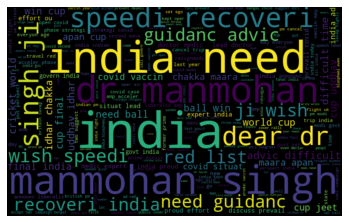

In [289]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

allWords = ' '.join([tweets for tweets in df['clean_tweet']])
wordCloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [8]:
df.Tweets.unique().shape


(2114,)

In [9]:
df['is_retweet'] = df['Tweets'].apply(lambda x: x[:2]=='RT')
df['is_retweet'].sum()  # number of retweets

df.loc[df['is_retweet']].Tweets.unique().size

df.groupby(['Tweets']).size().reset_index(name='counts')\
  .sort_values('counts', ascending=False).head(10)


Tweets  counts
1249  RT @SonuSood: C:   Cancel \nB:   Board’s \nS: ...     255
1322  RT @TrendPSPK: Friends,\n\nEMERGENCY REQUIREME...      38
1696  RT @nidhiindiatv: Delhi CM @ArvindKejriwal req...      34
1883  RT @trolllikebroo: Delhi CM comes out in suppo...      19
789   RT @DipshikhaGhosh: Please, please wear masks....      19
1499  RT @dinesh_sir: Thanks for taking decisions fo...      19
1598  RT @johnfraher: 💉Vaccine Tracker Update-April ...      16
1025  RT @MahuaMoitra: At Kumbh, Covid guard slips: ...      15
1622  RT @latokens: Cities for the post-COVID future...      15
1580  RT @imchandanRay: Gov’t should be held respons...      14

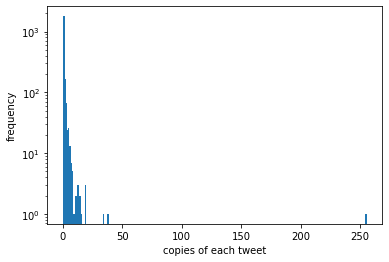

In [10]:
import numpy as np
import matplotlib.pyplot as plt
counts = df.groupby(['Tweets']).size()\
           .reset_index(name='counts')\
           .counts

# define bins for histogram
my_bins = np.arange(0,counts.max()+2, 1)-0.5

# plot histogram of tweet counts
plt.figure()
plt.hist(counts, bins = my_bins)
plt.xlabels = np.arange(1,counts.max()+1, 1)
plt.xlabel('copies of each tweet')
plt.ylabel('frequency')
plt.yscale('log', nonposy='clip')
plt.show()

In [11]:
def find_retweeted(tweet):
    '''This function will extract the twitter handles of retweed people'''
    return re.findall('(?<=RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

def find_mentioned(tweet):
    '''This function will extract the twitter handles of people mentioned in the tweet'''
    return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)  

def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)


In [12]:
my_tweet = 'RT @our_codingclub: Can @you find #all the #hashtags?'
my_other_tweet = 'Not a retweet. All views @my own'

df['retweeted'] = df.Tweets.apply(find_retweeted)
df['mentioned'] = df.Tweets.apply(find_mentioned)
df['hashtags'] = df.Tweets.apply(find_hashtags)

In [13]:
df[:10]


Tweets  \
0  RT @Joydas: When Is the Last Election Rally of...   
1  RT @abir_1729: #cancelboardexam2021\n#cancelbo...   
2  RT @LiveLawIndia: Can Centre Intervene If A St...   
3  RT @soompi: #GOT7's #BamBam Pauses Activities ...   
4  RT @NagpurKaRajini: So Covid in Maharashtra sp...   
5  UK economy returns to growth despite Covid res...   
6  RT @PGaspirant7: #postponeneetpg \n@profplal\n...   
7  RT @dinesh_sir: Thanks for taking decisions fo...   
8  RT @Nher_who: Now that India is facing Second ...   
9  RT @abcnews: Thousands of vulnerable Australia...   

                                                 new  \
0  RT @Joydas: When Is the Last Election Rally of...   
1  RT @abir_1729: #cancelboardexam2021\n#cancelbo...   
2  RT @LiveLawIndia: Can Centre Intervene If A St...   
3  RT @soompi: #GOT7's #BamBam Pauses Activities ...   
4  RT @NagpurKaRajini: So Covid in Maharashtra sp...   
5  UK economy returns to growth despite Covid res...   
6  RT @PGaspirant7: #postponeneetpg \n@profplal\n...   
7  RT @dinesh_sir: Thanks for taking decisions fo...   
8  RT @Nher_who: Now that India is facing Second ...   
9  RT @abcnews: Thousands of vulnerable Australia...   

                                           tidy_text  \
0  When Last Election Rally Narendra Modi West Be...   
1  #cancelboardexam #cancelboardexams students co...   
2  Centre Intervene State Doing Well High Court A...   
3  #GOT #BamBam Pauses Activities After Staff Mem...   
4  Covid Maharashtra spread because Modi rally We...   
5  economy returns growth despite Covid restrictions   
6  #postponeneetpg Covid stay here long Surge wil...   
7  Thanks taking decisions safety students please...   
8  that India facing Second COVID wave Lets Hope ...   
9  Thousands vulnerable Australians anxiously wai...   

                                                 tok  \
0  [When, Last, Election, Rally, Narendra, Modi, ...   
1  [#, cancelboardexam, #, cancelboardexams, stud...   
2  [Centre, Intervene, State, Doing, Well, High, ...   
3  [#, GOT, #, BamBam, Pauses, Activities, After,...   
4  [Covid, Maharashtra, spread, because, Modi, ra...   
5  [economy, returns, growth, despite, Covid, res...   
6  [#, postponeneetpg, Covid, stay, here, long, S...   
7  [Thanks, taking, decisions, safety, students, ...   
8  [that, India, facing, Second, COVID, wave, Let...   
9  [Thousands, vulnerable, Australians, anxiously...   

                                               nouns  \
0  [Election, Rally, Narendra, Modi, West, Bengal...   
1           [cancelboardexam, students, exam, dates]   
2  [Centre, Intervene, State, Doing, Well, High, ...   
3  [GOT, BamBam, Pauses, Activities, Staff, Membe...   
4  [Covid, Maharashtra, spread, Modi, West, Benga...   
5             [economy, growth, Covid, restrictions]   
6  [postponeneetpg, Covid, stay, Surge, wait, Surge]   
7  [Thanks, decisions, safety, students, picture,...   
8  [India, Second, COVID, Lets, Hope, funds, name...   
9           [Thousands, Australians, COVID, vaccine]   

                                         clean_tweet  is_retweet  \
0   last elect ralli narendra modi west bengal th...        True   
1   #cancelboardexam #cancelboardexams student ge...        True   
2   centr interven state well high court ask guja...        True   
3   #got #bambam paus activ staff member test pos...        True   
4   covid maharashtra spread modi ralli west beng...        True   
5    uk economi return growth despit covid restrict        False   
6   #postponeneetpg covid may stay long surg go p...        True   
7   thank take decis safeti student pleas tri cle...        True   
8   india face second covid wave let hope pm ask ...        True   
9   thousand vulner australian anxious wait covid...        True   

           retweeted    mentioned  \
0          [@Joydas]           []   
1       [@abir_1729]           []   
2    [@LiveLawIndia]           []   
3          [@soompi]           []   
4  [@NagpurKaRajini]       

In [14]:
hashtags_list_df = df.loc[
                       df.hashtags.apply(
                           lambda hashtags_list: hashtags_list !=[]
                       ),['hashtags']]

flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in hashtags_list_df.hashtags
    for hashtag in hashtags_list],
    columns=['hashtag'])


In [15]:
flattened_hashtags_df[:10]


hashtag
0   #cancelboardexam2021
1  #cancelboardexams2021
2                  #GOT7
3                #BamBam
4        #postponeneetpg
5              #Zimbabwe
6                #Africa
7   #cancelboardexam2021
8   #CongratulationsHaji
9  #cancelboardexams2021

In [16]:
flattened_hashtags_df['hashtag'].unique().size

449

In [17]:
popular_hashtags = flattened_hashtags_df.groupby('hashtag').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)


In [18]:
popular_hashtags[:10]


hashtag  counts
0      #cancelboardexams2021      56
1  #cancelcbseboardexams2021      34
2                   #COVID19      33
3                     #COVID      20
4       #cancelboardexam2021      17
5                     #India      14
6                     #Covid      13
7                      #CBSE      13
8             #KumbhMela2021      13
9   #SIDEBYSIDE_NEXT_TO_THE8      12

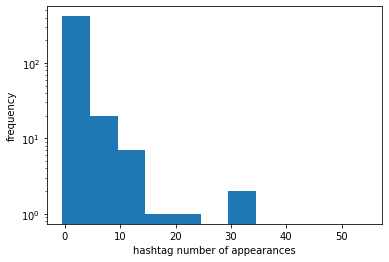

In [19]:
counts = flattened_hashtags_df.groupby(['hashtag']).size()\
                              .reset_index(name='counts')\
                              .counts

# define bins for histogram                              
my_bins = np.arange(0,counts.max()+2, 5)-0.5

# plot histogram of tweet counts
plt.figure()
plt.hist(counts, bins = my_bins)
plt.xlabels = np.arange(1,counts.max()+1, 1)
plt.xlabel('hashtag number of appearances')
plt.ylabel('frequency')
plt.yscale('log', nonposy='clip')
plt.show()


In [20]:
min_appearance = 10
# find popular hashtags - make into python set for efficiency
popular_hashtags_set = set(popular_hashtags[
                           popular_hashtags.counts>=min_appearance
                           ]['hashtag'])

hashtags_list_df['popular_hashtags'] = hashtags_list_df.hashtags.apply(
            lambda hashtag_list: [hashtag for hashtag in hashtag_list
                                  if hashtag in popular_hashtags_set])
# drop rows without popular hashtag
popular_hashtags_list_df = hashtags_list_df.loc[
            hashtags_list_df.popular_hashtags.apply(lambda hashtag_list: hashtag_list !=[])]

hashtag_vector_df = popular_hashtags_list_df.loc[:, ['popular_hashtags']]

for hashtag in popular_hashtags_set:
    # make columns to encode presence of hashtags
    hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
        lambda hashtag_list: int(hashtag in hashtag_list))

hashtag_matrix = hashtag_vector_df.drop('popular_hashtags', axis=1)


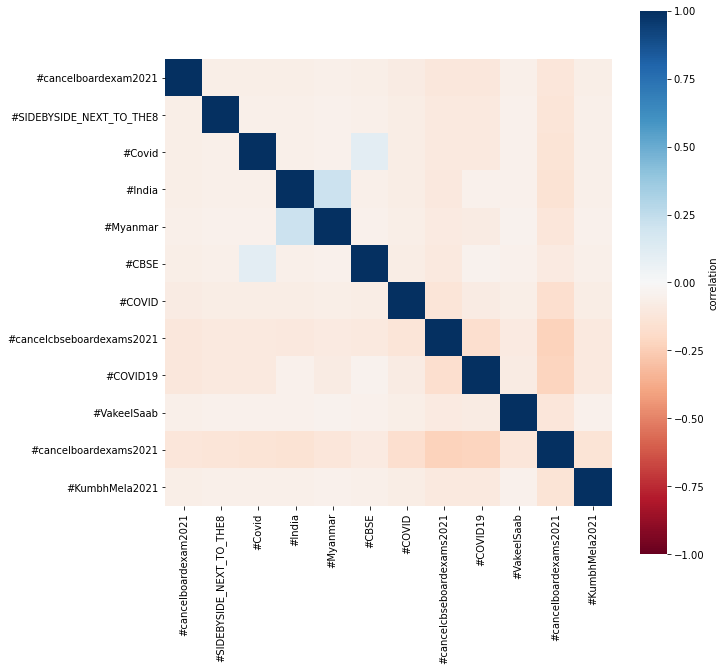

In [21]:
import seaborn as sns

correlations = hashtag_matrix.corr()

# plot the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(correlations,
    cmap='RdBu',
    vmin=-1,
    vmax=1,
    square = True,
    cbar_kws={'label':'correlation'})
plt.show()

In [22]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

nltk.download('stopwords')

def remove_links(tweet):

    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet

def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    return tweet

my_stopwords = nltk.corpus.stopwords.words('english')
word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'

# cleaning master function
def clean_tweet(tweet, bigrams=False):
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = tweet.lower() # lower case
    tweet = re.sub('['+my_punctuation + ']+', ' ', tweet) # strip punctuation
    tweet = re.sub('\s+', ' ', tweet) #remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet) # remove numbers
    tweet_token_list = [word for word in tweet.split(' ')
                            if word not in my_stopwords] # remove stopwords

    tweet_token_list = [word_rooter(word) if '#' not in word else word
                        for word in tweet_token_list] # apply word rooter
    if bigrams:
        tweet_token_list = tweet_token_list+[tweet_token_list[i]+'_'+tweet_token_list[i+1]
                                            for i in range(len(tweet_token_list)-1)]
    tweet = ' '.join(tweet_token_list)
    return tweet

nltk.download('stopwords')

df['clean_tweet'] = df.Tweets.apply(clean_tweet)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(df['clean_tweet']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 10

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

model.fit(tf)

LatentDirichletAllocation(random_state=0)

In [24]:

def display_topics(model, feature_names, no_top_words):

    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)


In [25]:
no_top_words = 10

p = display_topics(model, tf_feature_names, no_top_words)

#df['clean_tweet'][0].split(" ")

In [26]:
p

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights Topic 2 words  \
0          exam           712.2             …           165.8             …   
1         board           358.1          lakh            86.1         india   
2         centr           356.6         delhi            74.1           amp   
3        cancel           352.1         world            69.1          time   
4         becom           345.1       student            68.4          like   
5             …           318.9          come            58.4         peopl   
6           let           315.8         india            51.4            th   
7         covid           311.1          cbse            50.2         would   
8       student           310.0          exam            50.2          also   
9             ’           294.2        minist            46.9             i   

  Topic 2 weights Topic 3 words Topic 3 weights Topic 4 words Topic 4 weights  \
0           310.2             …           243.8             …           186.8   
1           247.0         covid           158.5          take            73.0   
2           144.7             ’           130.6        vaccin            66.7   
3            62.2          test            85.5         thank            63.5   
4            62.1            ’t            85.1         india            53.9   
5            60.3           one            64.7         covid            52.3   
6            54.0          live            64.1           say            49.0   
7            38.1         india            58.4           tri            45.1   
8            33.1         first            55.4          post            43.1   
9            32.4          news            53.3         futur            41.9   

  Topic 5 words Topic 5 weights      Topic 6 words Topic 6 weights  \
0          call           106.1                  …           234.4   
1        friend            97.1              covid           179.0   
2         pleas            94.3              india            78.4   
3             …            89.9               case            71.8   
4         covid            87.0               need            64.8   
5         place            83.1             hospit            61.1   
6         emerg            74.1             second            50.5   
7         blood            72.1                 pm            47.1   
8        requir            70.1              trend            42.1   
9         trust            67.1  #cancelboardexams            42.1   

  Topic 7 words Topic 7 weights Topic 8 words Topic 8 weights Topic 9 words  \
0             …           181.7         covid           398.7             …   
1         covid           127.5             …           261.9         covid   
2         posit            96.2        vaccin           214.3            us   
3         peopl            92.2          case            82.7          year   
4          good            79.8         death            80.1        vaccin   
5          test            74.0           new            61.3          book   
6       request            65.1           get            59.4          last   
7          mask            64.1        #covid            54.2           due   
8         pleas            58.6            uk            50.7         peopl   
9          know            58.0         emerg            50.1           age   

  Topic 9 weights  
0           299.6  
1           227.0  
2           107.6  
3           100.5  
4            87.9  
5            74.8  
6            70.2  
7            51.7  
8            47.7  
9            44.6

In [27]:
from numpy import log, exp
from numpy import argmax
import json
from numpy.random import multinomial

class MovieGroupProcess:
    def __init__(self, K=8, alpha=0.1, beta=0.1, n_iters=30):
        '''
        A MovieGroupProcess is a conceptual model introduced by Yin and Wang 2014 to
        describe their Gibbs sampling algorithm for a Dirichlet Mixture Model for the
        clustering short text documents.
        Reference: http://dbgroup.cs.tsinghua.edu.cn/wangjy/papers/KDD14-GSDMM.pdf
        Imagine a professor is leading a film class. At the start of the class, the students
        are randomly assigned to K tables. Before class begins, the students make lists of
        their favorite films. The teacher reads the role n_iters times. When
        a student is called, the student must select a new table satisfying either:
            1) The new table has more students than the current table.
        OR
            2) The new table has students with similar lists of favorite movies.
        :param K: int
            Upper bound on the number of possible clusters. Typically many fewer
        :param alpha: float between 0 and 1
            Alpha controls the probability that a student will join a table that is currently empty
            When alpha is 0, no one will join an empty table.
        :param beta: float between 0 and 1
            Beta controls the student's affinity for other students with similar interests. A low beta means
            that students desire to sit with students of similar interests. A high beta means they are less
            concerned with affinity and are more influenced by the popularity of a table
        :param n_iters:
        '''
        self.K = K
        self.alpha = alpha
        self.beta = beta
        self.n_iters = n_iters

        # slots for computed variables
        self.number_docs = None
        self.vocab_size = None
        self.cluster_doc_count = [0 for _ in range(K)]
        self.cluster_word_count = [0 for _ in range(K)]
        self.cluster_word_distribution = [{} for i in range(K)]
    @staticmethod
    def from_data(K, alpha, beta, D, vocab_size, cluster_doc_count, cluster_word_count, cluster_word_distribution):
        '''
        Reconstitute a MovieGroupProcess from previously fit data
        :param K:
        :param alpha:
        :param beta:
        :param D:
        :param vocab_size:
        :param cluster_doc_count:
        :param cluster_word_count:
        :param cluster_word_distribution:
        :return:
        '''
        mgp = MovieGroupProcess(K, alpha, beta, n_iters=30)
        mgp.number_docs = D
        mgp.vocab_size = vocab_size
        mgp.cluster_doc_count = cluster_doc_count
        mgp.cluster_word_count = cluster_word_count
        mgp.cluster_word_distribution = cluster_word_distribution
        return mgp

    @staticmethod
    def _sample(p):
        '''
        Sample with probability vector p from a multinomial distribution
        :param p: list
            List of probabilities representing probability vector for the multinomial distribution
        :return: int
            index of randomly selected output
        '''
        return [i for i, entry in enumerate(multinomial(1, p)) if entry != 0][0]
    def fit(self, docs, vocab_size):
        '''
        Cluster the input documents
        :param docs: list of list
            list of lists containing the unique token set of each document
        :param V: total vocabulary size for each document
        :return: list of length len(doc)
            cluster label for each document
        '''
        alpha, beta, K, n_iters, V = self.alpha, self.beta, self.K, self.n_iters, vocab_size

        D = len(docs)
        self.number_docs = D
        self.vocab_size = vocab_size

        # unpack to easy var names
        m_z, n_z, n_z_w = self.cluster_doc_count, self.cluster_word_count, self.cluster_word_distribution
        cluster_count = K
        d_z = [None for i in range(len(docs))]

        # initialize the clusters
        for i, doc in enumerate(docs):

            # choose a random  initial cluster for the doc
            z = self._sample([1.0 / K for _ in range(K)])
            d_z[i] = z
            m_z[z] += 1
            n_z[z] += len(doc)
           
            for word in doc:
                if word not in n_z_w[z]:
                    n_z_w[z][word] = 0
                n_z_w[z][word] += 1

        for _iter in range(n_iters):
            total_transfers = 0
            for i, doc in enumerate(docs):

                # remove the doc from it's current cluster
                z_old = d_z[i]

                m_z[z_old] -= 1
                n_z[z_old] -= len(doc)

                for word in doc:
                    n_z_w[z_old][word] -= 1

                    # compact dictionary to save space
                    if n_z_w[z_old][word] == 0:
                        del n_z_w[z_old][word]

                # draw sample from distribution to find new cluster
                p = self.score(doc)
                z_new = self._sample(p)

                # transfer doc to the new cluster
                if z_new != z_old:
                    total_transfers += 1

                d_z[i] = z_new
                m_z[z_new] += 1
                n_z[z_new] += len(doc)

                for word in doc:
                    if word not in n_z_w[z_new]:
                        n_z_w[z_new][word] = 0
                    n_z_w[z_new][word] += 1

            cluster_count_new = sum([1 for v in m_z if v > 0])
            print("In stage %d: transferred %d clusters with %d clusters populated" % (
            _iter, total_transfers, cluster_count_new))
            if total_transfers == 0 and cluster_count_new == cluster_count and _iter>25:
                print("Converged.  Breaking out.")
                break
            cluster_count = cluster_count_new
        self.cluster_word_distribution = n_z_w
        return d_z

    def score(self, doc):
        '''
        Score a document
        Implements formula (3) of Yin and Wang 2014.
        http://dbgroup.cs.tsinghua.edu.cn/wangjy/papers/KDD14-GSDMM.pdf
        :param doc: list[str]: The doc token stream
        :return: list[float]: A length K probability vector where each component represents
                              the probability of the document appearing in a particular cluster
        '''
        alpha, beta, K, V, D = self.alpha, self.beta, self.K, self.vocab_size, self.number_docs
        m_z, n_z, n_z_w = self.cluster_doc_count, self.cluster_word_count, self.cluster_word_distribution

        p = [0 for _ in range(K)]

        #  We break the formula into the following pieces
        #  p = N1*N2/(D1*D2) = exp(lN1 - lD1 + lN2 - lD2)
        #  lN1 = log(m_z[z] + alpha)
        #  lN2 = log(D - 1 + K*alpha)
        #  lN2 = log(product(n_z_w[w] + beta)) = sum(log(n_z_w[w] + beta))
        #  lD2 = log(product(n_z[d] + V*beta + i -1)) = sum(log(n_z[d] + V*beta + i -1))

        lD1 = log(D - 1 + K * alpha)
        doc_size = len(doc)
        for label in range(K):
            lN1 = log(m_z[label] + alpha)
            lN2 = 0
            lD2 = 0
            for word in doc:
                lN2 += log(n_z_w[label].get(word, 0) + beta)
                for j in range(1, doc_size +1):
                  lD2 += log(n_z[label] + V * beta + j - 1)
            p[label] = exp(lN1 - lD1 + lN2 - lD2)

        # normalize the probability vector
        pnorm = sum(p)
        pnorm = pnorm if pnorm>0 else 1
        return [pp/pnorm for pp in p]

    def choose_best_label(self, doc):
        '''
        Choose the highest probability label for the input document
        :param doc: list[str]: The doc token stream
        :return:
        '''
        p = self.score(doc)
        return argmax(p),max(p)

In [28]:
mgp = MovieGroupProcess(K= 10, alpha=0.1, beta=0.1, n_iters=30)






In [29]:
n_terms

3537

In [30]:
np.random.seed(0)

In [31]:

y = mgp.fit(docs ,n_terms)


In stage 0: transferred 2601 clusters with 10 clusters populated
In stage 1: transferred 1214 clusters with 10 clusters populated
In stage 2: transferred 733 clusters with 10 clusters populated
In stage 3: transferred 656 clusters with 10 clusters populated
In stage 4: transferred 619 clusters with 10 clusters populated
In stage 5: transferred 564 clusters with 10 clusters populated
In stage 6: transferred 560 clusters with 10 clusters populated
In stage 7: transferred 576 clusters with 10 clusters populated
In stage 8: transferred 557 clusters with 10 clusters populated
In stage 9: transferred 517 clusters with 10 clusters populated
In stage 10: transferred 545 clusters with 10 clusters populated
In stage 11: transferred 523 clusters with 10 clusters populated
In stage 12: transferred 555 clusters with 10 clusters populated
In stage 13: transferred 509 clusters with 10 clusters populated
In stage 14: transferred 532 clusters with 10 clusters populated
In stage 15: transferred 518 clus

In [32]:
docs

[['elect',
  'ralli',
  'narendra',
  'modi',
  'west',
  'bengal',
  'that',
  'elect',
  'commiss',
  'covid'],
 ['cancelboardexam', 'student', 'exam', 'date'],
 ['centr',
  'interven',
  'state',
  'do',
  'well',
  'high',
  'court',
  'ask',
  'gujarat',
  'covid',
  'situat'],
 ['got',
  'bambam',
  'paus',
  'activ',
  'staff',
  'member',
  'test',
  'posit',
  'covid'],
 ['covid', 'maharashtra', 'spread', 'modi', 'west', 'bengal', 'peopl'],
 ['economi', 'growth', 'covid', 'restrict'],
 ['postponeneetpg', 'covid', 'stay', 'surg', 'wait', 'surg'],
 ['thank', 'decis', 'safeti', 'student', 'pictur', 'exam', 'pattern'],
 ['india', 'second', 'covid', 'let', 'hope', 'fund', 'name', 'pmcare'],
 ['thousand', 'australian', 'covid', 'vaccin'],
 ['china', 'report', 'covid', 'case'],
 ['clinic', 'colleagu', 'counti'],
 ['didn', 'peopl', 'trump', 'covid', 'medicin', 'tissu'],
 ['cabinet', 'envoy', 'minist', 'salari'],
 ['couldn', 'money', 'vacat', 'covid', 'trump', 'haven'],
 ['godi',
  'me

In [33]:
import numpy as np
doc_count = np.array(mgp.cluster_doc_count)

print('Number_of_documents per topic:', doc_count)
print('*'*20)



Number_of_documents per topic: [310 383 347 361 306 345 334 371 291 234]
********************


In [34]:
doc_count

array([310, 383, 347, 361, 306, 345, 334, 371, 291, 234])

In [35]:
temp = mgp.cluster_word_distribution


In [36]:
temp

[{'cancelboardexam': 59,
  'student': 117,
  'exam': 51,
  'covid': 118,
  'maharashtra': 8,
  'case': 42,
  'india': 20,
  'cbse': 95,
  'board': 86,
  'delhi': 126,
  'request': 41,
  'centr': 86,
  'govt': 40,
  'cancelcbseboardexam': 35,
  'fear': 36,
  'hot': 47,
  'pleas': 13,
  'cancel': 34,
  'life': 6,
  'actor': 15,
  'demand': 13,
  'govern': 7,
  'health': 2,
  'link': 4,
  'situat': 3,
  'thank': 38,
  'appeal': 6,
  'resurg': 5,
  'pandem': 2,
  'corona': 7,
  'year': 18,
  'colleg': 5,
  'cell': 2,
  'atla': 2,
  'cord': 2,
  'onlin': 5,
  'descript': 2,
  'everyon': 14,
  'wave': 8,
  'mull': 2,
  'decis': 29,
  'safeti': 20,
  'pictur': 20,
  'pattern': 19,
  'land': 4,
  'right': 4,
  'defend': 4,
  'lawyer': 4,
  'pap': 7,
  'leader': 6,
  'secur': 4,
  'forc': 4,
  'hour': 23,
  'patient': 7,
  'support': 10,
  'indian': 6,
  'tag': 2,
  'follow': 2,
  'version': 2,
  'unprecedentedtim': 2,
  'guy': 3,
  'trend': 4,
  'hasn': 4,
  'think': 3,
  'express': 6,
  'area

In [37]:
top_index = doc_count.argsort()[-10:][::-1]


In [38]:
top_index = top_index.tolist()

In [39]:
top_index

[1, 7, 3, 2, 5, 6, 0, 4, 8, 9]

In [40]:
print('Most important Topics/clusters (by number of documents inside):', top_index)


Most important Topics/clusters (by number of documents inside): [1, 7, 3, 2, 5, 6, 0, 4, 8, 9]


In [41]:
def top_words(cluster_word_distribution, top_cluster, values):
    for cluster in top_cluster:
        sort_dicts =sorted(mgp.cluster_word_distribution[cluster].items(), key=lambda k: k[1], reverse=True)[:values]
        print("\nCluster %s : %s"%(cluster,sort_dicts))

In [197]:
top_words(mgp.cluster_word_distribution, top_index, 10)


Cluster 1 : [('covid', 165), ('india', 32), ('case', 31), ('health', 28), ('vaccin', 27), ('time', 21), ('children', 21), ('student', 19), ('peopl', 19), ('year', 17)]

Cluster 7 : [('covid', 211), ('vaccin', 118), ('peopl', 56), ('india', 50), ('book', 50), ('death', 37), ('world', 36), ('year', 25), ('rollout', 22), ('england', 21)]

Cluster 3 : [('covid', 115), ('india', 112), ('case', 41), ('year', 33), ('world', 24), ('countri', 24), ('corona', 21), ('posit', 19), ('test', 18), ('state', 16)]

Cluster 2 : [('covid', 144), ('vaccin', 137), ('india', 102), ('day', 56), ('approv', 35), ('govt', 30), ('emerg', 29), ('peopl', 24), ('tweet', 24), ('today', 22)]

Cluster 5 : [('covid', 94), ('india', 91), ('peopl', 32), ('cbse', 26), ('board', 23), ('year', 22), ('citi', 22), ('exam', 21), ('effort', 19), ('hindu', 18)]

Cluster 6 : [('covid', 148), ('vaccin', 57), ('india', 53), ('case', 31), ('govern', 29), ('ghana', 28), ('studi', 22), ('staff', 20), ('test', 19), ('bambam', 18)]

Cl

In [338]:
#from topic_allocation import topic_attribution
topic = {}
topic_name = [ 'vaccine',
               'boardexamtenth',
               'patients in india',
               'vaccine',
               'boardexam',
               'patients in india',
               'vaccine',
               'boardexam',
               'patients in india',
               'vaccine'
          
          ]
for i, topic_num in enumerate(top_index):
  topic[topic_num] = topic_name[i]
  

In [339]:
tokenized_text = tokenized_tweet

In [340]:
def create_topics_dataframe(data_text=data_text,  mgp=mgp, threshold=0.3, topic=topic, tokenized_text=tokenized_text):
    
    result = pd.DataFrame(columns=['Text', 'Topic', 'Tokenized-text'])
    print(data_text[0])
    i = 0
    for i, text in enumerate(data_text):
        
        result.at[i, 'Text'] = text
        result.at[i, 'Tokenized-text'] = tokenized_text[i]
        prob = mgp.choose_best_label(tokenized_text[i])
        if prob[1] >= threshold:
            result.at[i, 'Topic'] = topic[prob[0]]
        else:
            result.at[i, 'Topic'] = 'Other'
    return result
    



In [341]:
result = create_topics_dataframe(data_text=data_text, mgp=mgp, threshold=0.3, topic=topic, tokenized_text=tokenized_text)
result.head(15)


RT @Joydas: When Is the Last Election Rally of Narendra Modi in West Bengal? That’s the Day Election Commission will decide too many Covid…


Text              Topic  \
0   RT @Joydas: When Is the Last Election Rally of...              Other   
1   RT @abir_1729: #cancelboardexam2021\n#cancelbo...            vaccine   
2   RT @LiveLawIndia: Can Centre Intervene If A St...              Other   
3   RT @soompi: #GOT7's #BamBam Pauses Activities ...  patients in india   
4   RT @NagpurKaRajini: So Covid in Maharashtra sp...            vaccine   
5   UK economy returns to growth despite Covid res...            vaccine   
6   RT @PGaspirant7: #postponeneetpg \n@profplal\n...  patients in india   
7   RT @dinesh_sir: Thanks for taking decisions fo...            vaccine   
8   RT @Nher_who: Now that India is facing Second ...     boardexamtenth   
9   RT @abcnews: Thousands of vulnerable Australia...     boardexamtenth   
10  RT @Reuters: China reports 9 new COVID-19 case...  patients in india   
11  RT @DrTeckKhong: I’ve been asked if I would co...          boardexam   
12  @XanderhalTV Didn't hear a peep out of these p...  patients in india   
13  RT @syahredzan: Make your cabinet smaller, rem...  patients in india   
14  RT @DoraResists: @thomaskaine5 You couldn’t pa...  patients in india   

                                       Tokenized-text  
0   [elect, ralli, narendra, modi, west, bengal, t...  
1              [cancelboardexam, student, exam, date]  
2   [centr, interven, state, do, well, high, court...  
3   [got, bambam, paus, activ, staff, member, test...  
4   [covid, maharashtra, spread, modi, west, benga...  
5                  [economi, growth, covid, restrict]  
6     [postponeneetpg, covid, stay, surg, wait, surg]  
7   [thank, decis, safeti, student, pictur, exam, ...  
8   [india, second, covid, let, hope, fund, name, ...  
9               [thousand, australian, covid, vaccin]  
10                       [china, report, covid, case]  
11                         [clinic, colleagu, counti]  
12        [didn, peopl, trump, covid, medicin, tissu]  
13                   [cabinet, envoy, minist, salari]  
14        [couldn, money, vacat, covid, trump, haven]

In [49]:
import plotly.express as px

fig = px.pie(result, names='Topic',  title='Topics', color_discrete_sequence=px.colors.sequential.Burg)
fig.show()


In [48]:
!pip install plotly

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=cd3bfb47b52a1e2f96af5d21d8fffa6d4fd3f3fc9ab02b492c4de81ed6c7ebd6
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


In [50]:
z = []

for item in y: 
    if item not in z:
        z.append(item)



In [51]:
z

[9, 0, 6, 2, 3, 7, 5, 8, 1, 4]

In [52]:
for item in z: 

    print(y.count(item))




234
310
334
347
361
371
345
291
383
306


In [53]:

df





Tweets  \
0     RT @Joydas: When Is the Last Election Rally of...   
1     RT @abir_1729: #cancelboardexam2021\n#cancelbo...   
2     RT @LiveLawIndia: Can Centre Intervene If A St...   
3     RT @soompi: #GOT7's #BamBam Pauses Activities ...   
4     RT @NagpurKaRajini: So Covid in Maharashtra sp...   
...                                                 ...   
3277  RT @LawyerInBaking: 2020 March : India ran out...   
3278  RT @KirenRijiju: She is Inshah Bashir, Wheelch...   
3279  RT @indiacom: Regarding CBSE Board Exams 2021,...   
3280  RT @KanwalSibal: Why this obsession with dialo...   
3281  RT @Suhelseth: You might also wish us Happy Va...   

                                                    new  \
0     RT @Joydas: When Is the Last Election Rally of...   
1     RT @abir_1729: #cancelboardexam2021\n#cancelbo...   
2     RT @LiveLawIndia: Can Centre Intervene If A St...   
3     RT @soompi: #GOT7's #BamBam Pauses Activities ...   
4     RT @NagpurKaRajini: So Covid in Maharashtra sp...   
...                                                 ...   
3277  RT @LawyerInBaking: 2020 March : India ran out...   
3278  RT @KirenRijiju: She is Inshah Bashir, Wheelch...   
3279  RT @indiacom: Regarding CBSE Board Exams 2021,...   
3280  RT @KanwalSibal: Why this obsession with dialo...   
3281  RT @Suhelseth: You might also wish us Happy Va...   

                                              tidy_text  \
0     When Last Election Rally Narendra Modi West Be...   
1     #cancelboardexam #cancelboardexams students co...   
2     Centre Intervene State Doing Well High Court A...   
3     #GOT #BamBam Pauses Activities After Staff Mem...   
4     Covid Maharashtra spread because Modi rally We...   
...                                                 ...   
3277  March India RTPCR test kits because government...   
3278  Inshah Bashir Wheelchair Basketball Player fro...   
3279  Regarding CBSE Board Exams Kejriwal said some ...   
3280  this obsession with dialogue with asking some ...   
3281  might also wish Happy Vaisakhi Ugadi Navratri ...   

                                                    tok  \
0     [When, Last, Election, Rally, Narendra, Modi, ...   
1     [#, cancelboardexam, #, cancelboardexams, stud...   
2     [Centre, Intervene, State, Doing, Well, High, ...   
3     [#, GOT, #, BamBam, Pauses, Activities, After,...   
4     [Covid, Maharashtra, spread, because, Modi, ra...   
...                                                 ...   
3277  [March, India, RTPCR, test, kits, because, gov...   
3278  [Inshah, Bashir, Wheelchair, Basketball, Playe...   
3279  [Regarding, CBSE, Board, Exams, Kejriwal, said...   
3280  [this, obsession, with, dialogue, with, asking...   
3281  [might, also, wish, Happy, Vaisakhi, Ugadi, Na...   

                                                  nouns  \
0     [Election, Rally, Narendra, Modi, West, Bengal...   
1              [cancelboardexam, students, exam, dates]   
2     [Centre, Intervene, State, Doing, Well, High, ...   
3     [GOT, BamBam, Pauses, Activities, Staff, Membe...   
4     [Covid, Maharashtra, spread, Modi, West, Benga...   
...                                                 ...   
3277  [March, India, RTPCR, test, kits, government, ...   
3278  [Inshah, Bashir, Wheelchair, Basketball, Playe...   
3279  [CBSE, Board, Exams, Kejriwal, methods, students]   
3280  [obsession, dialogue, concession, Implication,...   
3281  [Happy, Vaisakhi, Ugadi, Navratri, tomorrow, V...   

                                            clean_tweet  is_retweet  \
0      last elect ralli narendra modi west bengal th...        True   
1      #cancelboardexam #cancelboardexams student ge...        True   
2      centr interven state well high court ask guja...        True   
3      #got #bambam paus activ staff member test pos...        True   
4      covid maharashtra spread modi ralli west beng...        True   
...                                                 ...         ...   
3277   

In [54]:
df['cluster']=y


In [55]:
df[:10]

Tweets  \
0  RT @Joydas: When Is the Last Election Rally of...   
1  RT @abir_1729: #cancelboardexam2021\n#cancelbo...   
2  RT @LiveLawIndia: Can Centre Intervene If A St...   
3  RT @soompi: #GOT7's #BamBam Pauses Activities ...   
4  RT @NagpurKaRajini: So Covid in Maharashtra sp...   
5  UK economy returns to growth despite Covid res...   
6  RT @PGaspirant7: #postponeneetpg \n@profplal\n...   
7  RT @dinesh_sir: Thanks for taking decisions fo...   
8  RT @Nher_who: Now that India is facing Second ...   
9  RT @abcnews: Thousands of vulnerable Australia...   

                                                 new  \
0  RT @Joydas: When Is the Last Election Rally of...   
1  RT @abir_1729: #cancelboardexam2021\n#cancelbo...   
2  RT @LiveLawIndia: Can Centre Intervene If A St...   
3  RT @soompi: #GOT7's #BamBam Pauses Activities ...   
4  RT @NagpurKaRajini: So Covid in Maharashtra sp...   
5  UK economy returns to growth despite Covid res...   
6  RT @PGaspirant7: #postponeneetpg \n@profplal\n...   
7  RT @dinesh_sir: Thanks for taking decisions fo...   
8  RT @Nher_who: Now that India is facing Second ...   
9  RT @abcnews: Thousands of vulnerable Australia...   

                                           tidy_text  \
0  When Last Election Rally Narendra Modi West Be...   
1  #cancelboardexam #cancelboardexams students co...   
2  Centre Intervene State Doing Well High Court A...   
3  #GOT #BamBam Pauses Activities After Staff Mem...   
4  Covid Maharashtra spread because Modi rally We...   
5  economy returns growth despite Covid restrictions   
6  #postponeneetpg Covid stay here long Surge wil...   
7  Thanks taking decisions safety students please...   
8  that India facing Second COVID wave Lets Hope ...   
9  Thousands vulnerable Australians anxiously wai...   

                                                 tok  \
0  [When, Last, Election, Rally, Narendra, Modi, ...   
1  [#, cancelboardexam, #, cancelboardexams, stud...   
2  [Centre, Intervene, State, Doing, Well, High, ...   
3  [#, GOT, #, BamBam, Pauses, Activities, After,...   
4  [Covid, Maharashtra, spread, because, Modi, ra...   
5  [economy, returns, growth, despite, Covid, res...   
6  [#, postponeneetpg, Covid, stay, here, long, S...   
7  [Thanks, taking, decisions, safety, students, ...   
8  [that, India, facing, Second, COVID, wave, Let...   
9  [Thousands, vulnerable, Australians, anxiously...   

                                               nouns  \
0  [Election, Rally, Narendra, Modi, West, Bengal...   
1           [cancelboardexam, students, exam, dates]   
2  [Centre, Intervene, State, Doing, Well, High, ...   
3  [GOT, BamBam, Pauses, Activities, Staff, Membe...   
4  [Covid, Maharashtra, spread, Modi, West, Benga...   
5             [economy, growth, Covid, restrictions]   
6  [postponeneetpg, Covid, stay, Surge, wait, Surge]   
7  [Thanks, decisions, safety, students, picture,...   
8  [India, Second, COVID, Lets, Hope, funds, name...   
9           [Thousands, Australians, COVID, vaccine]   

                                         clean_tweet  is_retweet  \
0   last elect ralli narendra modi west bengal th...        True   
1   #cancelboardexam #cancelboardexams student ge...        True   
2   centr interven state well high court ask guja...        True   
3   #got #bambam paus activ staff member test pos...        True   
4   covid maharashtra spread modi ralli west beng...        True   
5    uk economi return growth despit covid restrict        False   
6   #postponeneetpg covid may stay long surg go p...        True   
7   thank take decis safeti student pleas tri cle...        True   
8   india face second covid wave let hope pm ask ...        True   
9   thousand vulner australian anxious wait covid...        True   

           retweeted    mentioned  \
0          [@Joydas]           []   
1       [@abir_1729]           []   
2    [@LiveLawIndia]           []   
3          [@soompi]           []   
4  [@NagpurKaRajini]       

In [198]:
df[df['cluster']==9]

Tweets  \
0     RT @Joydas: When Is the Last Election Rally of...   
2     RT @LiveLawIndia: Can Centre Intervene If A St...   
4     RT @NagpurKaRajini: So Covid in Maharashtra sp...   
48    Police charge organizers of Lethbridge house p...   
67    RT @Joydas: Cholera Epidemic Broke out in Kumb...   
...                                                 ...   
3177  RT @htTweets: Amid rising cases of Covid-19, U...   
3217  RT @dhruv_rathee: 👉Tablighi Jamat \n\nDate: Ap...   
3227  RT @htTweets: Kerala minister KT Jaleel resign...   
3254  RT @thecaravanindia: A Scania audit reveals em...   
3275  RT @rashtrapatibhvn: Greetings to fellow citiz...   

                                                    new  \
0     RT @Joydas: When Is the Last Election Rally of...   
2     RT @LiveLawIndia: Can Centre Intervene If A St...   
4     RT @NagpurKaRajini: So Covid in Maharashtra sp...   
48    Police charge organizers of Lethbridge house p...   
67    RT @Joydas: Cholera Epidemic Broke out in Kumb...   
...                                                 ...   
3177  RT @htTweets: Amid rising cases of Covid-19, U...   
3217  RT @dhruv_rathee: 👉Tablighi Jamat \n\nDate: Ap...   
3227  RT @htTweets: Kerala minister KT Jaleel resign...   
3254  RT @thecaravanindia: A Scania audit reveals em...   
3275  RT @rashtrapatibhvn: Greetings to fellow citiz...   

                                              tidy_text  \
0     When Last Election Rally Narendra Modi West Be...   
2     Centre Intervene State Doing Well High Court A...   
4     Covid Maharashtra spread because Modi rally We...   
48    Police charge organizers Lethbridge house part...   
67    Cholera Epidemic Broke Kumbh Mela Around Peopl...   
...                                                 ...   
3177  Amid rising cases Covid Uttarakhand chief mini...   
3217  Tablighi Jamat Date April Daily Cases India Pe...   
3227  Kerala minister Jaleel resigned Tuesday from P...   
3254  Scania audit reveals emails messages exchanged...   
3275  Greetings fellow citizens Chaitra Sukladi Ugad...   

                                                    tok  \
0     [When, Last, Election, Rally, Narendra, Modi, ...   
2     [Centre, Intervene, State, Doing, Well, High, ...   
4     [Covid, Maharashtra, spread, because, Modi, ra...   
48    [Police, charge, organizers, Lethbridge, house...   
67    [Cholera, Epidemic, Broke, Kumbh, Mela, Around...   
...                                                 ...   
3177  [Amid, rising, cases, Covid, Uttarakhand, chie...   
3217  [Tablighi, Jamat, Date, April, Daily, Cases, I...   
3227  [Kerala, minister, Jaleel, resigned, Tuesday, ...   
3254  [Scania, audit, reveals, emails, messages, exc...   
3275  [Greetings, fellow, citizens, Chaitra, Sukladi...   

                                                  nouns  \
0     [Election, Rally, Narendra, Modi, West, Bengal...   
2     [Centre, Intervene, State, Doing, Well, High, ...   
4     [Covid, Maharashtra, spread, Modi, West, Benga...   
48    [Police, charge, organizers, Lethbridge, house...   
67    [Cholera, Epidemic, Broke, Kumbh, Mela, People...   
...                                                 ...   
3177  [cases, Covid, Uttarakhand, minister, Tirath, ...   
3217  [Tablighi, Jamat, Date, April, Daily, Cases, I...   
3227  [Kerala, minister, Jaleel, Tuesday, Pinarayi, ...   
3254  [Scania, audit, reveals, messages, Scania, Ind...   
3275  [Greetings, citizens, Chaitra, Sukladi, Ugadi,...   

                                            clean_tweet  is_retweet  \
0      last elect ralli narendra modi west bengal th...        True   
2      centr interven state well high court ask guja...        True   
4      covid maharashtra spread modi ralli west beng...        True   
48    polic charg organ lethbridg hous parti violat ...       False   
67     cholera epidem broke kumbh mela  around   peo...        True   
...                                                 ...         ...   
3177   

In [57]:
c0 = df[df['cluster']==0]
c1 = df[df['cluster']==1]
c2 = df[df['cluster']==2]
c3 = df[df['cluster']==3]
c4 = df[df['cluster']==4]
c5 = df[df['cluster']==5]
c6 = df[df['cluster']==6]
c7 = df[df['cluster']==7]
c8 = df[df['cluster']==8]
c9 = df[df['cluster']==9]

In [199]:
c0

Tweets  \
1     RT @abir_1729: #cancelboardexam2021\n#cancelbo...   
7     RT @dinesh_sir: Thanks for taking decisions fo...   
17    RT @Voize_of_Reazon: Just hours after tweeting...   
28    RT @AnmolKa17138645: #cancelboardexam2021 \nAs...   
34    #cancelboardexams2021 #cancelcbseboards2021 \n...   
...                                                 ...   
3214  RT @SadhguruJV: Resurgence of pandemic an indi...   
3228  🎊It’s a wrap! #NeuroFemIndia2021 🎊\n\nSo 💯 gra...   
3236  RT @Lolzz53544865: #cancelboardexams2021 #canc...   
3270  RT @Lolzz53544865: #cancelboardexams2021 #canc...   
3279  RT @indiacom: Regarding CBSE Board Exams 2021,...   

                                                    new  \
1     RT @abir_1729: #cancelboardexam2021\n#cancelbo...   
7     RT @dinesh_sir: Thanks for taking decisions fo...   
17    RT @Voize_of_Reazon: Just hours after tweeting...   
28    RT @AnmolKa17138645: #cancelboardexam2021 \nAs...   
34    #cancelboardexams2021 #cancelcbseboards2021 \n...   
...                                                 ...   
3214  RT @SadhguruJV: Resurgence of pandemic an indi...   
3228  🎊It’s a wrap! #NeuroFemIndia2021 🎊\n\nSo 💯 gra...   
3236  RT @Lolzz53544865: #cancelboardexams2021 #canc...   
3270  RT @Lolzz53544865: #cancelboardexams2021 #canc...   
3279  RT @indiacom: Regarding CBSE Board Exams 2021,...   

                                              tidy_text  \
1     #cancelboardexam #cancelboardexams students co...   
7     Thanks taking decisions safety students please...   
17    Just hours after tweeting this killed while ri...   
28    #cancelboardexam covid cases rising here India...   
34    #cancelboardexams #cancelcbseboards government...   
...                                                 ...   
3214  Resurgence pandemic indictment human compulsiv...   
3228  wrap #NeuroFemIndia grateful everyone chose pa...   
3236  #cancelboardexams #cancleboardexam CBSE board ...   
3270  #cancelboardexams #cancleboardexam CBSE board ...   
3279  Regarding CBSE Board Exams Kejriwal said some ...   

                                                    tok  \
1     [#, cancelboardexam, #, cancelboardexams, stud...   
7     [Thanks, taking, decisions, safety, students, ...   
17    [Just, hours, after, tweeting, this, killed, w...   
28    [#, cancelboardexam, covid, cases, rising, her...   
34    [#, cancelboardexams, #, cancelcbseboards, gov...   
...                                                 ...   
3214  [Resurgence, pandemic, indictment, human, comp...   
3228  [wrap, #, NeuroFemIndia, grateful, everyone, c...   
3236  [#, cancelboardexams, #, cancleboardexam, CBSE...   
3270  [#, cancelboardexams, #, cancleboardexam, CBSE...   
3279  [Regarding, CBSE, Board, Exams, Kejriwal, said...   

                                                  nouns  \
1              [cancelboardexam, students, exam, dates]   
7     [Thanks, decisions, safety, students, picture,...   
17                     [Just, hours, love, cycle, hell]   
28    [cancelboardexam, covid, cases, India, cbse, b...   
34    [cancelboardexams, cancelcbseboards, governmen...   
...                                                 ...   
3214  [Resurgence, indictment, compulsiveness, Sacri...   
3228  [wrap, NeuroFemIndia, grateful, everyone, conf...   
3236  [cancelboardexams, cancleboardexam, CBSE, boar...   
3270  [cancelboardexams, cancleboardexam, CBSE, boar...   
3279  [CBSE, Board, Exams, Kejriwal, methods, students]   

                                            clean_tweet  is_retweet  \
1      #cancelboardexam #cancelboardexams student ge...        True   
7      thank take decis safeti student pleas tri cle...        True   
17     hour tweet kill ride bike love cycl cautiou h...        True   
28     #cancelboardexam see covid case rise india cb...        True   
34    #cancelboardexams #cancelcbseboards govern lis...       False   
...                                                 ...         ...   
3214   

In [59]:
import csv 
c0.to_csv('c0.csv')
c1.to_csv('c1.csv')
c2.to_csv('c2.csv')
c3.to_csv('c3.csv')
c4.to_csv('c4.csv')
c5.to_csv('c5.csv')
c6.to_csv('c6.csv')
c7.to_csv('c7.csv')
c8.to_csv('c8.csv')
c9.to_csv('c9.csv')


In [217]:
import pandas as pd
colnames = ['Tweets','is_retweet','retweeted','mentioned','hashtags','clean_tweet','cluster','new', 'tidy_text', 'tok', 'nouns']
df1 = pd.read_csv('c0.csv', names=colnames)


In [235]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

nltk.download('stopwords')

def remove_links(tweet):

    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet

def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    return tweet

my_stopwords = nltk.corpus.stopwords.words('english')
word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'

# cleaning master function
def clean_tweet(tweet, bigrams=False):
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = tweet.lower() # lower case
    tweet = re.sub('['+my_punctuation + ']+', ' ', tweet) # strip punctuation
    tweet = re.sub('\s+', ' ', tweet) #remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet) # remove numbers
    tweet_token_list = [word for word in tweet.split(' ')
                            if word not in my_stopwords] # remove stopwords

    tweet_token_list = [word_rooter(word) if '#' not in word else word
                        for word in tweet_token_list] # apply word rooter
    if bigrams:
        tweet_token_list = tweet_token_list+[tweet_token_list[i]+'_'+tweet_token_list[i+1]
                                            for i in range(len(tweet_token_list)-1)]
    tweet = ' '.join(tweet_token_list)
    return tweet

nltk.download('stopwords')

df1['clean_tweet'] = df1.Tweets.apply(clean_tweet)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [236]:
fetched_tweets = df1.clean_tweet.tolist()


In [237]:
fetched_tweets

['tweet',
 ' #cancelboardexam #cancelboardexams student get covid affect exam date happen ht…',
 ' thank take decis safeti student pleas tri clear pictur futur exam pattern asap s…',
 ' hour tweet kill ride bike love cycl cautiou hell i…',
 ' #cancelboardexam see covid case rise india cbse focus board o…',
 '#cancelboardexams #cancelcbseboards govern listen student even assuming… ',
 ' delhi cm come support student cbse board exam held delhi  lakh student amp  lakh teacher wi…',
 ' #cancelboardexam see covid case rise india cbse focus board on…',
 ' omg second wave covid  reach peak cbse want conduct board exam lakh student wil appearin…',
 ' delhi cm request centr govt #cancelcbseboardexams amid fear exam centr becom covid hots…',
 ' critic situat everyon also student mental prepar offlin exam right governmen…',
 ' delhi cm request centr govt #cancelcbseboardexams amid fear exam centr becom covid hots…',
 ' thank ',
 ' cbse think board exam brilliant student pass get addmiss good coll

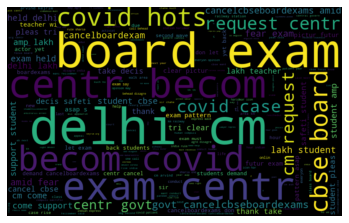

In [238]:
from wordcloud import WordCloud 

allWords = ' '.join([tweets for tweets in df1['clean_tweet']])
wordCloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [239]:
!pip install wordCloud

In [240]:
def get_tweet_sentiment(tweet):
		'''
		Utility function to classify sentiment of passed tweet
		using textblob's sentiment method
		'''
		# create TextBlob object of passed tweet text
		analysis = TextBlob(tweet)
		# set sentiment
		if analysis.sentiment.polarity > 0:
			return 'positive'
		elif analysis.sentiment.polarity == 0:
			return 'neutral'
		else:
			return 'negative'


In [241]:
	# parsing tweets one by one

from textblob import TextBlob
tweets = []
for tweet in fetched_tweets:
  #print(tweet)
				# empty dictionary to store required params of a tweet
  parsed_tweet = {}
  parsed_tweet['text'] = tweet
  parsed_tweet['sentiment']=get_tweet_sentiment(tweet)
  tweets.append(parsed_tweet)
	
 
	
print(tweets)

[{'text': 'tweet', 'sentiment': 'neutral'}, {'text': ' #cancelboardexam #cancelboardexams student get covid affect exam date happen ht…', 'sentiment': 'neutral'}, {'text': ' thank take decis safeti student pleas tri clear pictur futur exam pattern asap s…', 'sentiment': 'positive'}, {'text': ' hour tweet kill ride bike love cycl cautiou hell i…', 'sentiment': 'positive'}, {'text': ' #cancelboardexam see covid case rise india cbse focus board o…', 'sentiment': 'neutral'}, {'text': '#cancelboardexams #cancelcbseboards govern listen student even assuming… ', 'sentiment': 'neutral'}, {'text': ' delhi cm come support student cbse board exam held delhi  lakh student amp  lakh teacher wi…', 'sentiment': 'neutral'}, {'text': ' #cancelboardexam see covid case rise india cbse focus board on…', 'sentiment': 'neutral'}, {'text': ' omg second wave covid  reach peak cbse want conduct board exam lakh student wil appearin…', 'sentiment': 'neutral'}, {'text': ' delhi cm request centr govt #cancelcbsebo

In [242]:
!pip install textblob

In [243]:
tweets

[{'text': 'tweet', 'sentiment': 'neutral'},
 {'text': ' #cancelboardexam #cancelboardexams student get covid affect exam date happen ht…',
  'sentiment': 'neutral'},
 {'text': ' thank take decis safeti student pleas tri clear pictur futur exam pattern asap s…',
  'sentiment': 'positive'},
 {'text': ' hour tweet kill ride bike love cycl cautiou hell i…',
  'sentiment': 'positive'},
 {'text': ' #cancelboardexam see covid case rise india cbse focus board o…',
  'sentiment': 'neutral'},
 {'text': '#cancelboardexams #cancelcbseboards govern listen student even assuming… ',
  'sentiment': 'neutral'},
 {'text': ' delhi cm come support student cbse board exam held delhi  lakh student amp  lakh teacher wi…',
  'sentiment': 'neutral'},
 {'text': ' #cancelboardexam see covid case rise india cbse focus board on…',
  'sentiment': 'neutral'},
 {'text': ' omg second wave covid  reach peak cbse want conduct board exam lakh student wil appearin…',
  'sentiment': 'neutral'},
 {'text': ' delhi cm request

In [244]:

   
# output the dataframe
  

ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
	# percentage of positive tweets
print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))
	# picking negative tweets from tweets
ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
	# percentage of negative tweets
print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))
	# percentage of neutral tweets
print("Neutral tweets percentage: {} % \
		".format(100*(len(tweets) -(len( ntweets )+len( ptweets)))/len(tweets)))

	# printing first 5 positive tweets
print("\n\nPositive tweets:")
for tweet in ptweets[:400]:
	print(tweet['text'])

	# printing first 5 negative tweets
print("\n\nNegative tweets:")
for tweet in ntweets[:10]:
  print(tweet['text'])


Positive tweets percentage: 22.186495176848876 %
Negative tweets percentage: 6.752411575562701 %
Neutral tweets percentage: 71.06109324758843 % 		


Positive tweets:
 thank take decis safeti student pleas tri clear pictur futur exam pattern asap s…
 hour tweet kill ride bike love cycl cautiou hell i…
 critic situat everyon also student mental prepar offlin exam right governmen…
 cbse think board exam brilliant student pass get addmiss good colleg if…
 #cancelboardexam #internalassessment amaz full ever seen thank support
  land right defend lawyer repres pap pap leader arbitrarili arrest secur forces…
   new #covid case delhi arvind kejriw say cancel board exam 
 thank take decis safeti student pleas tri clear pictur futur exam pattern asap s…
 around  #covid case delhi peopl age  last  hour   new case report #delh…
rt dheerajrakho delhi report   new covid case  hour #covid #c…
 thank take decis safeti student pleas tri clear pictur futur exam pattern asap s…
 thank take decis safeti s

In [245]:

import pandas as pd

df1 = pd.DataFrame(tweets, columns=['sentiment'])
df1.head(1000)


sentiment
0     neutral
1     neutral
2    positive
3    positive
4     neutral
..        ...
306   neutral
307   neutral
308   neutral
309   neutral
310   neutral

[311 rows x 1 columns]

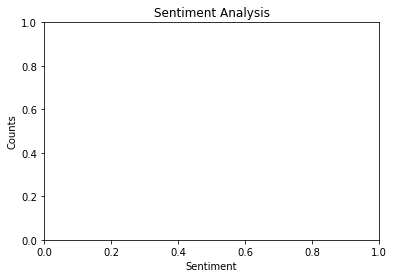

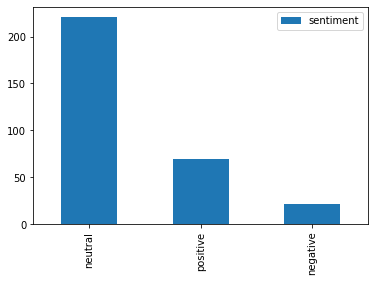

In [246]:
df1.apply(pd.Series.value_counts)
plt.title('Sentiment Analysis')
plt.xlabel ('Sentiment')
plt.ylabel('Counts')
df1.apply(pd.Series.value_counts).plot(kind = 'bar')
plt.show()


In [247]:
import pandas as pd
colnames = ['Tweets','is_retweet','retweeted','mentioned','hashtags','clean_tweet','cluster','new', 'tidy_text', 'tok', 'nouns']
df2 = pd.read_csv('c1.csv', names=colnames)


In [248]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

nltk.download('stopwords')

def remove_links(tweet):

    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet

def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    return tweet

my_stopwords = nltk.corpus.stopwords.words('english')
word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'

# cleaning master function
def clean_tweet(tweet, bigrams=False):
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = tweet.lower() # lower case
    tweet = re.sub('['+my_punctuation + ']+', ' ', tweet) # strip punctuation
    tweet = re.sub('\s+', ' ', tweet) #remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet) # remove numbers
    tweet_token_list = [word for word in tweet.split(' ')
                            if word not in my_stopwords] # remove stopwords

    tweet_token_list = [word_rooter(word) if '#' not in word else word
                        for word in tweet_token_list] # apply word rooter
    if bigrams:
        tweet_token_list = tweet_token_list+[tweet_token_list[i]+'_'+tweet_token_list[i+1]
                                            for i in range(len(tweet_token_list)-1)]
    tweet = ' '.join(tweet_token_list)
    return tweet

nltk.download('stopwords')

df2['clean_tweet'] = df2.Tweets.apply(clean_tweet)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [249]:
fetched_tweets = df2.clean_tweet.tolist()


In [250]:
fetched_tweets

['tweet',
 ' need share around thing happen time video topic top off…',
 ' coronaviru diseas sever affect country’ healthcar system situat wors june l…',
 ' doctor control covid situat assur student parent control si…',
 ' worri it’ covid vaccin relat nobodi give fu ',
 'latest covid  case among filipino abroad april   new confirm case  new recoveri … ',
 ' import low incom emerg economi access covid  vaccin intern monetari fu…',
 ' option scenario deal #publicdebt post covid #euroarea …',
 '  mp mani young covid life time pandem expect ala number would pas…',
 ' doctor control covid situat assur student parent control si…',
 ' covid  driven advanc autom artifici intellig risk exacerb econom inequ bmj read m…',
 'don’t get wrong i’m say don’t get vax exclud womxn research use white middl aged… ',
 ' 🔥📢🚨protest covid job cuts🔥🔴🚨 cleaner face redund concern regard exposure…',
 ' parent step kid san marco teacher alissa piro caught berat student leak zoom parent co…',
 ' malaysia confirm 

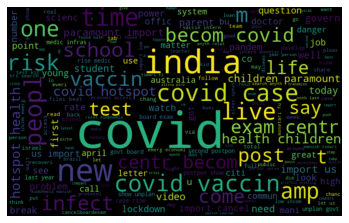

In [251]:
from wordcloud import WordCloud 

allWords = ' '.join([tweets for tweets in df2['clean_tweet']])
wordCloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [252]:
def get_tweet_sentiment(tweet):
		'''
		Utility function to classify sentiment of passed tweet
		using textblob's sentiment method
		'''
		# create TextBlob object of passed tweet text
		analysis = TextBlob(tweet)
		# set sentiment
		if analysis.sentiment.polarity > 0:
			return 'positive'
		elif analysis.sentiment.polarity == 0:
			return 'neutral'
		else:
			return 'negative'


In [253]:
from textblob import TextBlob
tweets = []
for tweet in fetched_tweets:
  #print(tweet)
				# empty dictionary to store required params of a tweet
  parsed_tweet = {}
  parsed_tweet['text'] = tweet
  parsed_tweet['sentiment']=get_tweet_sentiment(tweet)
  tweets.append(parsed_tweet)
	
 
	
print(tweets)

[{'text': 'tweet', 'sentiment': 'neutral'}, {'text': ' need share around thing happen time video topic top off…', 'sentiment': 'positive'}, {'text': ' coronaviru diseas sever affect country’ healthcar system situat wors june l…', 'sentiment': 'neutral'}, {'text': ' doctor control covid situat assur student parent control si…', 'sentiment': 'neutral'}, {'text': ' worri it’ covid vaccin relat nobodi give fu ', 'sentiment': 'neutral'}, {'text': 'latest covid  case among filipino abroad april   new confirm case  new recoveri … ', 'sentiment': 'positive'}, {'text': ' import low incom emerg economi access covid  vaccin intern monetari fu…', 'sentiment': 'neutral'}, {'text': ' option scenario deal #publicdebt post covid #euroarea …', 'sentiment': 'neutral'}, {'text': '  mp mani young covid life time pandem expect ala number would pas…', 'sentiment': 'positive'}, {'text': ' doctor control covid situat assur student parent control si…', 'sentiment': 'neutral'}, {'text': ' covid  driven advanc a

In [254]:

   
# output the dataframe
  

ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
	# percentage of positive tweets
print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))
	# picking negative tweets from tweets
ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
	# percentage of negative tweets
print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))
	# percentage of neutral tweets
print("Neutral tweets percentage: {} % \
		".format(100*(len(tweets) -(len( ntweets )+len( ptweets)))/len(tweets)))

	# printing first 5 positive tweets
print("\n\nPositive tweets:")
for tweet in ptweets[:400]:
	print(tweet['text'])

	# printing first 5 negative tweets
print("\n\nNegative tweets:")
for tweet in ntweets[:10]:
  print(tweet['text'])


Positive tweets percentage: 29.947916666666668 %
Negative tweets percentage: 15.625 %
Neutral tweets percentage: 54.427083333333336 % 		


Positive tweets:
 need share around thing happen time video topic top off…
latest covid  case among filipino abroad april   new confirm case  new recoveri … 
  mp mani young covid life time pandem expect ala number would pas…
 malaysia confirm   new covid  case today sarawak record highest number infect  case followed…
 come right thing 
 “we take care health come power first put health risk ralli us covid…
true
 latest mutant covid
 📢 week rd econom polici panel econom covid  📅  amp  april full programm 
 new covid  infect singapor includ first dormitori case sinc feb  todayonlin 
 jamiewhyt i’d agre peopl don’t use right i’m ok hand th… 
 scienc like journal alway follow trail evid wherev lead fine articl amateur…
 latest obr forecast suggest uk economi return pre pandem level well  estim end sept…
 dedic video mr e sreedharan still believ bjp ele

In [255]:

import pandas as pd

df2 = pd.DataFrame(tweets, columns=['sentiment'])
df2.head(1000)


sentiment
0     neutral
1    positive
2     neutral
3     neutral
4     neutral
..        ...
379   neutral
380   neutral
381   neutral
382  positive
383   neutral

[384 rows x 1 columns]

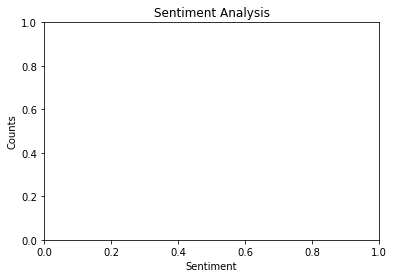

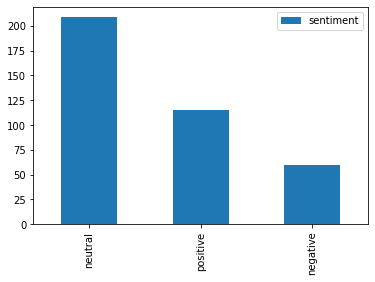

In [256]:
df2.apply(pd.Series.value_counts)
plt.title('Sentiment Analysis')
plt.xlabel ('Sentiment')
plt.ylabel('Counts')
df2.apply(pd.Series.value_counts).plot(kind = 'bar')
plt.show()


In [257]:
import pandas as pd
colnames = ['Tweets','is_retweet','retweeted','mentioned','hashtags','clean_tweet','cluster','new', 'tidy_text', 'tok', 'nouns']
df3 = pd.read_csv('c2.csv', names=colnames)


In [258]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

nltk.download('stopwords')

def remove_links(tweet):

    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet

def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    return tweet

my_stopwords = nltk.corpus.stopwords.words('english')
word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'

# cleaning master function
def clean_tweet(tweet, bigrams=False):
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = tweet.lower() # lower case
    tweet = re.sub('['+my_punctuation + ']+', ' ', tweet) # strip punctuation
    tweet = re.sub('\s+', ' ', tweet) #remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet) # remove numbers
    tweet_token_list = [word for word in tweet.split(' ')
                            if word not in my_stopwords] # remove stopwords

    tweet_token_list = [word_rooter(word) if '#' not in word else word
                        for word in tweet_token_list] # apply word rooter
    if bigrams:
        tweet_token_list = tweet_token_list+[tweet_token_list[i]+'_'+tweet_token_list[i+1]
                                            for i in range(len(tweet_token_list)-1)]
    tweet = ' '.join(tweet_token_list)
    return tweet
nltk.download('stopwords')

df3['clean_tweet'] = df3.Tweets.apply(clean_tweet)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [259]:
fetched_tweets = df3.clean_tweet.tolist()


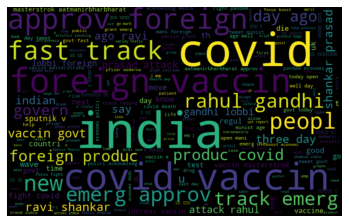

In [260]:
from wordcloud import WordCloud 

allWords = ' '.join([tweets for tweets in df3['clean_tweet']])
wordCloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [261]:
def get_tweet_sentiment(tweet):
		'''
		Utility function to classify sentiment of passed tweet
		using textblob's sentiment method
		'''
		# create TextBlob object of passed tweet text
		analysis = TextBlob(tweet)
		# set sentiment
		if analysis.sentiment.polarity > 0:
			return 'positive'
		elif analysis.sentiment.polarity == 0:
			return 'neutral'
		else:
			return 'negative'


In [262]:
from textblob import TextBlob
tweets = []
for tweet in fetched_tweets:
  #print(tweet)
				# empty dictionary to store required params of a tweet
  parsed_tweet = {}
  parsed_tweet['text'] = tweet
  parsed_tweet['sentiment']=get_tweet_sentiment(tweet)
  tweets.append(parsed_tweet)
	
 
	
print(tweets)

[{'text': 'tweet', 'sentiment': 'neutral'}, {'text': 'uk economi return growth despit covid restrict ', 'sentiment': 'neutral'}, {'text': ' godi media silent believ pleas pray god keep india safe modi amp rawat govt stun neg…', 'sentiment': 'positive'}, {'text': ' unbeliev stori list govern approv compani order coronaviru te…', 'sentiment': 'neutral'}, {'text': ' i’m angri flood toxic misinform spread covid vaccin it’ actual murderous…', 'sentiment': 'neutral'}, {'text': ' oxford astrazeneca ireland ok though 🤔 ‘the new guidelin say vaccin “i not…', 'sentiment': 'positive'}, {'text': ' #zimbabwe rank eighth term vaccin roll #africa impress record show leadership acumen d…', 'sentiment': 'negative'}, {'text': 'dexamethason show best result test drug reduc sever death far also inhibit tg… ', 'sentiment': 'positive'}, {'text': ' yrr tumn hardwork kiy hai bo wast toh ho nhi jaayega becz knowl… ', 'sentiment': 'neutral'}, {'text': ' artifici intellig predict futur covid  strain develop trea

In [263]:

   
# output the dataframe
  

ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
	# percentage of positive tweets
print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))
	# picking negative tweets from tweets
ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
	# percentage of negative tweets
print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))
	# percentage of neutral tweets
print("Neutral tweets percentage: {} % \
		".format(100*(len(tweets) -(len( ntweets )+len( ptweets)))/len(tweets)))

	# printing first 5 positive tweets
print("\n\nPositive tweets:")
for tweet in ptweets[:400]:
	print(tweet['text'])

	# printing first 5 negative tweets
print("\n\nNegative tweets:")
for tweet in ntweets[:10]:
  print(tweet['text'])


Positive tweets percentage: 28.735632183908045 %
Negative tweets percentage: 20.402298850574713 %
Neutral tweets percentage: 50.86206896551724 % 		


Positive tweets:
 godi media silent believ pleas pray god keep india safe modi amp rawat govt stun neg…
 oxford astrazeneca ireland ok though 🤔 ‘the new guidelin say vaccin “i not…
dexamethason show best result test drug reduc sever death far also inhibit tg… 
 major peopl drink today younger age group low risk die covid …
 hope one true becom avail everywher uk clinic trial confirm sanotize’ breakthrough treatment fo…
 look like despit say need  actual book vaccin first second are…
 good morn pleas long take receiv fund accept approv covid  loan 
 talk keep covid pt er proactiv test other sure make avoid few… 
 indian govt fast track emerg approv foreign produc covid  vaccin receiv eua abroad details…
 ‘have vaccin break fast it’ consid nutrit ’ gp dr reassur observ…
 #cnbctvexclusive new mechan bridg trial requir #covid vaccin pfizer mo

In [264]:

import pandas as pd

df3 = pd.DataFrame(tweets, columns=['sentiment'])
df3.head(1000)


sentiment
0     neutral
1     neutral
2    positive
3     neutral
4     neutral
..        ...
343   neutral
344  positive
345  negative
346   neutral
347  positive

[348 rows x 1 columns]

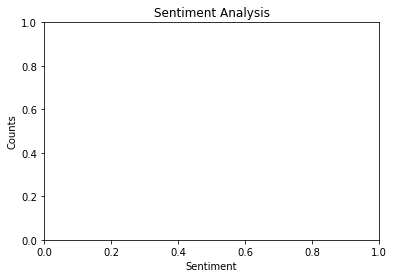

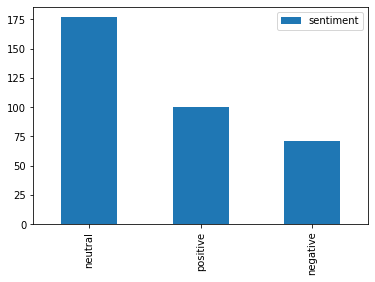

In [265]:
df3.apply(pd.Series.value_counts)
plt.title('Sentiment Analysis')
plt.xlabel ('Sentiment')
plt.ylabel('Counts')
df3.apply(pd.Series.value_counts).plot(kind = 'bar')
plt.show()


In [266]:
import pandas as pd
colnames = ['Tweets','is_retweet','retweeted','mentioned','hashtags','clean_tweet','cluster','new', 'tidy_text', 'tok', 'nouns']
df4 = pd.read_csv('c3.csv', names=colnames)


In [267]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

nltk.download('stopwords')

def remove_links(tweet):

    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet

def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    return tweet

my_stopwords = nltk.corpus.stopwords.words('english')
word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'

# cleaning master function
def clean_tweet(tweet, bigrams=False):
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = tweet.lower() # lower case
    tweet = re.sub('['+my_punctuation + ']+', ' ', tweet) # strip punctuation
    tweet = re.sub('\s+', ' ', tweet) #remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet) # remove numbers
    tweet_token_list = [word for word in tweet.split(' ')
                            if word not in my_stopwords] # remove stopwords

    tweet_token_list = [word_rooter(word) if '#' not in word else word
                        for word in tweet_token_list] # apply word rooter
    if bigrams:
        tweet_token_list = tweet_token_list+[tweet_token_list[i]+'_'+tweet_token_list[i+1]
                                            for i in range(len(tweet_token_list)-1)]
    tweet = ' '.join(tweet_token_list)
    return tweet

nltk.download('stopwords')

df4['clean_tweet'] = df4.Tweets.apply(clean_tweet)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [268]:
fetched_tweets = df4.clean_tweet.tolist()


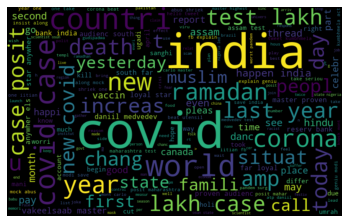

In [269]:
from wordcloud import WordCloud 

allWords = ' '.join([tweets for tweets in df4['clean_tweet']])
wordCloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [270]:
def get_tweet_sentiment(tweet):
		'''
		Utility function to classify sentiment of passed tweet
		using textblob's sentiment method
		'''
		# create TextBlob object of passed tweet text
		analysis = TextBlob(tweet)
		# set sentiment
		if analysis.sentiment.polarity > 0:
			return 'positive'
		elif analysis.sentiment.polarity == 0:
			return 'neutral'
		else:
			return 'negative'


In [271]:
from textblob import TextBlob
tweets = []
for tweet in fetched_tweets:
  #print(tweet)
				# empty dictionary to store required params of a tweet
  parsed_tweet = {}
  parsed_tweet['text'] = tweet
  parsed_tweet['sentiment']=get_tweet_sentiment(tweet)
  tweets.append(parsed_tweet)
	
 
	
print(tweets)

[{'text': 'tweet', 'sentiment': 'neutral'}, {'text': ' #postponeneetpg covid may stay long surg go pl wait surg subsid this…', 'sentiment': 'negative'}, {'text': ' china report  new covid  case vs  day earlier ', 'sentiment': 'positive'}, {'text': '  new covid  case ', 'sentiment': 'positive'}, {'text': 'must almost imposs peopl refrain pre covid lifestyl supress month is… ', 'sentiment': 'neutral'}, {'text': 'chang came play yesterday thought would good moment recap rule what… ', 'sentiment': 'positive'}, {'text': ' covid i’d eas cute gyno hotwif lifestyl start explain surpris pregn…', 'sentiment': 'positive'}, {'text': ' microchip develop pentagon detect covid  ', 'sentiment': 'neutral'}, {'text': 'mani covid case pune fck ', 'sentiment': 'neutral'}, {'text': ' sometim feel like religion covid danc go turn 👉', 'sentiment': 'neutral'}, {'text': ' extrem worri potenti effect #longcovid taken account frame polici so…', 'sentiment': 'neutral'}, {'text': ' guy suffer bad side effect time 

In [272]:

   
# output the dataframe
  

ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
	# percentage of positive tweets
print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))
	# picking negative tweets from tweets
ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
	# percentage of negative tweets
print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))
	# percentage of neutral tweets
print("Neutral tweets percentage: {} % \
		".format(100*(len(tweets) -(len( ntweets )+len( ptweets)))/len(tweets)))

	# printing first 5 positive tweets
print("\n\nPositive tweets:")
for tweet in ptweets[:400]:
	print(tweet['text'])

	# printing first 5 negative tweets
print("\n\nNegative tweets:")
for tweet in ntweets[:10]:
  print(tweet['text'])


Positive tweets percentage: 29.558011049723756 %
Negative tweets percentage: 12.707182320441989 %
Neutral tweets percentage: 57.73480662983425 % 		


Positive tweets:
 china report  new covid  case vs  day earlier 
  new covid  case 
chang came play yesterday thought would good moment recap rule what… 
 covid i’d eas cute gyno hotwif lifestyl start explain surpris pregn…
   lakh new #covid case  death   posit rate chhattisgarh   maharashtra   india contin…
 scientist osun state nigeria led develop fast track test covid  cer…
 ramadan kareem mani resid celebr ramadan ask everyon stay safe festiv period f…
 tell go sheep think covid real play along scam… 
 reason world best cm maharashtra lead front covid effect number … 
yeah citi major effect untadi asalu second wave lo till date highest case vastuna aa occup excel a… 
us   trillion lost everi year to# tobacco use new guid show countri way cut us   tr… 
 chang came play yesterday thought would good moment recap rule you…
 haridwar maha

In [273]:

import pandas as pd

df4 = pd.DataFrame(tweets, columns=['sentiment'])
df4.head(1000)


sentiment
0     neutral
1    negative
2    positive
3    positive
4     neutral
..        ...
357   neutral
358  positive
359   neutral
360  positive
361   neutral

[362 rows x 1 columns]

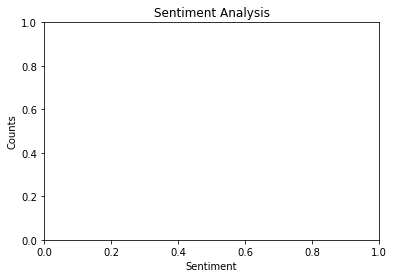

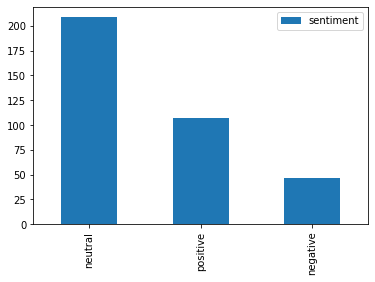

In [274]:
df4.apply(pd.Series.value_counts)
plt.title('Sentiment Analysis')
plt.xlabel ('Sentiment')
plt.ylabel('Counts')
df4.apply(pd.Series.value_counts).plot(kind = 'bar')
plt.show()


In [275]:
import pandas as pd
colnames = ['Tweets','is_retweet','retweeted','mentioned','hashtags','clean_tweet','cluster','new', 'tidy_text', 'tok', 'nouns']
df5 = pd.read_csv('c4.csv', names=colnames)


In [276]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

nltk.download('stopwords')

def remove_links(tweet):

    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet

def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    return tweet

my_stopwords = nltk.corpus.stopwords.words('english')
word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'

# cleaning master function
def clean_tweet(tweet, bigrams=False):
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = tweet.lower() # lower case
    tweet = re.sub('['+my_punctuation + ']+', ' ', tweet) # strip punctuation
    tweet = re.sub('\s+', ' ', tweet) #remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet) # remove numbers
    tweet_token_list = [word for word in tweet.split(' ')
                            if word not in my_stopwords] # remove stopwords

    tweet_token_list = [word_rooter(word) if '#' not in word else word
                        for word in tweet_token_list] # apply word rooter
    if bigrams:
        tweet_token_list = tweet_token_list+[tweet_token_list[i]+'_'+tweet_token_list[i+1]
                                            for i in range(len(tweet_token_list)-1)]
    tweet = ' '.join(tweet_token_list)
    return tweet

nltk.download('stopwords')

df5['clean_tweet'] = df5.Tweets.apply(clean_tweet)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [277]:
fetched_tweets = df5.clean_tweet.tolist()


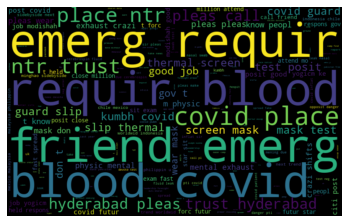

In [278]:
from wordcloud import WordCloud 

allWords = ' '.join([tweets for tweets in df5['clean_tweet']])
wordCloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [279]:
def get_tweet_sentiment(tweet):
		'''
		Utility function to classify sentiment of passed tweet
		using textblob's sentiment method
		'''
		# create TextBlob object of passed tweet text
		analysis = TextBlob(tweet)
		# set sentiment
		if analysis.sentiment.polarity > 0:
			return 'positive'
		elif analysis.sentiment.polarity == 0:
			return 'neutral'
		else:
			return 'negative'


In [280]:
from textblob import TextBlob
tweets = []
for tweet in fetched_tweets:
  #print(tweet)
				# empty dictionary to store required params of a tweet
  parsed_tweet = {}
  parsed_tweet['text'] = tweet
  parsed_tweet['sentiment']=get_tweet_sentiment(tweet)
  tweets.append(parsed_tweet)
	
 
	
print(tweets)

[{'text': 'tweet', 'sentiment': 'neutral'}, {'text': ' friend emerg requir blood covid place ntr trust hyderabad pleas call  …', 'sentiment': 'neutral'}, {'text': ' pleas pleas wear mask don’t know peopl i’m physic mental exhaust crazi shifts…', 'sentiment': 'negative'}, {'text': ' comment risk covid transmiss hospit import alway tr…', 'sentiment': 'neutral'}, {'text': ' gov’t held respons gov’t forc futur star sit exam fast spread…', 'sentiment': 'positive'}, {'text': ' gym pub still close wale would great bbc bother learn what’ happen outsid lond…', 'sentiment': 'positive'}, {'text': ' citi post covid futur ', 'sentiment': 'neutral'}, {'text': ' urgent requir b plasma donor— someon recov covid last  month asian hospit faridabad…', 'sentiment': 'neutral'}, {'text': ' gov’t held respons gov’t forc futur star sit exam fast spread…', 'sentiment': 'positive'}, {'text': ' kumbh covid guard slip thermal screen mask  test posit good job modishah good job yogicm ke…', 'sentiment': 'positive'}

In [281]:

   
# output the dataframe
  

ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
	# percentage of positive tweets
print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))
	# picking negative tweets from tweets
ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
	# percentage of negative tweets
print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))
	# percentage of neutral tweets
print("Neutral tweets percentage: {} % \
		".format(100*(len(tweets) -(len( ntweets )+len( ptweets)))/len(tweets)))

	# printing first 5 positive tweets
print("\n\nPositive tweets:")
for tweet in ptweets[:400]:
	print(tweet['text'])

	# printing first 5 negative tweets
print("\n\nNegative tweets:")
for tweet in ntweets[:10]:
  print(tweet['text'])


Positive tweets percentage: 19.218241042345277 %
Negative tweets percentage: 17.91530944625407 %
Neutral tweets percentage: 62.86644951140065 % 		


Positive tweets:
 gov’t held respons gov’t forc futur star sit exam fast spread…
 gym pub still close wale would great bbc bother learn what’ happen outsid lond…
 gov’t held respons gov’t forc futur star sit exam fast spread…
 kumbh covid guard slip thermal screen mask  test posit good job modishah good job yogicm ke…
 gov’t held respons gov’t forc futur star sit exam fast spread…
 gov’t held respons gov’t forc futur star sit exam fast spread…
  unmask guy covid workshop  spray shall reap  better poor amp healthi ric…
 gov’t held respons gov’t forc futur star sit exam fast spread…
 opposit danger pti covid inflat sir pleas make pakistan free cov… 
 gov’t held respons gov’t forc futur star sit exam fast spread…
 let get right you’v vax you’ll allow big event without recent test even though may…
 gov’t held respons gov’t forc futur star sit 

In [282]:

import pandas as pd

df5 = pd.DataFrame(tweets, columns=['sentiment'])
df5.head(1000)


sentiment
0     neutral
1     neutral
2    negative
3     neutral
4    positive
..        ...
302   neutral
303   neutral
304   neutral
305  negative
306  positive

[307 rows x 1 columns]

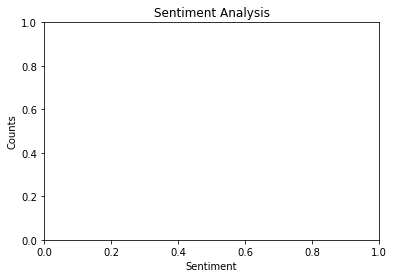

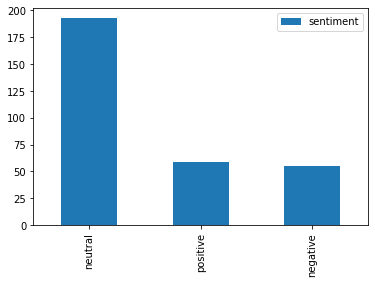

In [283]:
df5.apply(pd.Series.value_counts)
plt.title('Sentiment Analysis')
plt.xlabel ('Sentiment')
plt.ylabel('Counts')
df5.apply(pd.Series.value_counts).plot(kind = 'bar')
plt.show()


In [284]:
import pandas as pd
colnames = ['Tweets','is_retweet','retweeted','mentioned','hashtags','clean_tweet','cluster','new', 'tidy_text', 'tok', 'nouns']
df6 = pd.read_csv('c5.csv', names=colnames)


In [285]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

nltk.download('stopwords')

def remove_links(tweet):

    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet

def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    return tweet

my_stopwords = nltk.corpus.stopwords.words('english')
word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'

# cleaning master function
def clean_tweet(tweet, bigrams=False):
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = tweet.lower() # lower case
    tweet = re.sub('['+my_punctuation + ']+', ' ', tweet) # strip punctuation
    tweet = re.sub('\s+', ' ', tweet) #remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet) # remove numbers
    tweet_token_list = [word for word in tweet.split(' ')
                            if word not in my_stopwords] # remove stopwords

    tweet_token_list = [word_rooter(word) if '#' not in word else word
                        for word in tweet_token_list] # apply word rooter
    if bigrams:
        tweet_token_list = tweet_token_list+[tweet_token_list[i]+'_'+tweet_token_list[i+1]
                                            for i in range(len(tweet_token_list)-1)]
    tweet = ' '.join(tweet_token_list)
    return tweet

nltk.download('stopwords')

df6['clean_tweet'] = df6.Tweets.apply(clean_tweet)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [286]:
fetched_tweets = df6.clean_tweet.tolist()


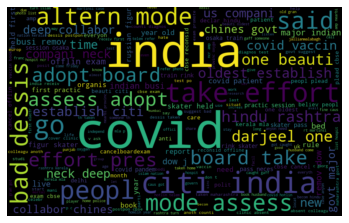

In [287]:
from wordcloud import WordCloud 

allWords = ' '.join([tweets for tweets in df6['clean_tweet']])
wordCloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [288]:
def get_tweet_sentiment(tweet):
		'''
		Utility function to classify sentiment of passed tweet
		using textblob's sentiment method
		'''
		# create TextBlob object of passed tweet text
		analysis = TextBlob(tweet)
		# set sentiment
		if analysis.sentiment.polarity > 0:
			return 'positive'
		elif analysis.sentiment.polarity == 0:
			return 'neutral'
		else:
			return 'negative'


In [289]:
from textblob import TextBlob
tweets = []
for tweet in fetched_tweets:
  #print(tweet)
				# empty dictionary to store required params of a tweet
  parsed_tweet = {}
  parsed_tweet['text'] = tweet
  parsed_tweet['sentiment']=get_tweet_sentiment(tweet)
  tweets.append(parsed_tweet)
	
 
	
print(tweets)

[{'text': 'tweet', 'sentiment': 'neutral'}, {'text': ' i’v ask would cover clinic absent colleagu anoth counti diagnos test po…', 'sentiment': 'neutral'}, {'text': ' oh bruce you’r go run covid sex circu ', 'sentiment': 'neutral'}, {'text': 'peopl shown empathi especi hard time covid  #congratulationshaji ', 'sentiment': 'negative'}, {'text': 'good decis long overdu mra regulatori bodi one stringent emerg requiremen… ', 'sentiment': 'positive'}, {'text': ' good decis altern assess way postpon long time #internalas…', 'sentiment': 'positive'}, {'text': 'listen gari vee podcast he’ talk life perspect said “you know if… ', 'sentiment': 'neutral'}, {'text': ' p chidambaram #teekautsav celebr call crusad read histori stay i…', 'sentiment': 'neutral'}, {'text': ' covid patient given oxygen autorikshaw visual satara district maharashtra ', 'sentiment': 'neutral'}, {'text': ' 🇷🇺russian figur skater held first practic session osaka train rink skater pass neces…', 'sentiment': 'positive'}, {'tex

In [290]:

   
# output the dataframe
  

ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
	# percentage of positive tweets
print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))
	# picking negative tweets from tweets
ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
	# percentage of negative tweets
print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))
	# percentage of neutral tweets
print("Neutral tweets percentage: {} % \
		".format(100*(len(tweets) -(len( ntweets )+len( ptweets)))/len(tweets)))

	# printing first 5 positive tweets
print("\n\nPositive tweets:")
for tweet in ptweets[:400]:
	print(tweet['text'])

	# printing first 5 negative tweets
print("\n\nNegative tweets:")
for tweet in ntweets[:10]:
  print(tweet['text'])


Positive tweets percentage: 29.479768786127167 %
Negative tweets percentage: 13.00578034682081 %
Neutral tweets percentage: 57.51445086705202 % 		


Positive tweets:
good decis long overdu mra regulatori bodi one stringent emerg requiremen… 
 good decis altern assess way postpon long time #internalas…
 🇷🇺russian figur skater held first practic session osaka train rink skater pass neces…
also follow everybodi direct medic aid
 everyon get free rapid covid  test show result  minut also show pr…
 hey   year old get jab book 
 laundri wash covid clean suppli fro… 
 almost everyth dub “conspiracy” becom true 
via lancet studi find link uk covid  variant higher mortal 
lancet studi find link uk covid  variant higher mortal 
 howlin  year old gran got covid fine caus got caught gaff someone’ th😂😂😂😂😂taken home police…
 good news use link book 
 🇷🇺russian figur skater held first practic session osaka train rink skater pass neces…
 full mark anti hindu left illiber machineri spin around covid me

In [291]:

import pandas as pd

df6 = pd.DataFrame(tweets, columns=['sentiment'])
df6.head(1000)


sentiment
0     neutral
1     neutral
2     neutral
3    negative
4    positive
..        ...
341   neutral
342   neutral
343  positive
344  positive
345  positive

[346 rows x 1 columns]

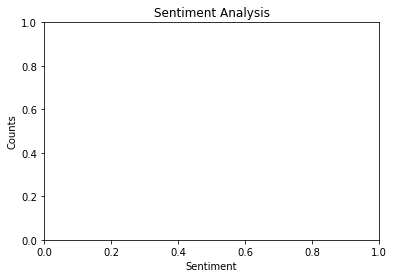

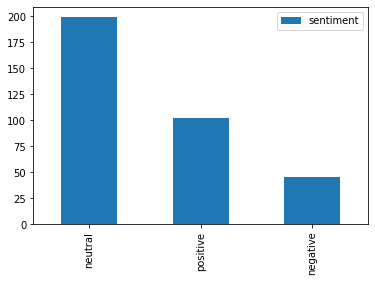

In [292]:
df6.apply(pd.Series.value_counts)
plt.title('Sentiment Analysis')
plt.xlabel ('Sentiment')
plt.ylabel('Counts')
df6.apply(pd.Series.value_counts).plot(kind = 'bar')
plt.show()


In [293]:
import pandas as pd
colnames = ['Tweets','is_retweet','retweeted','mentioned','hashtags','clean_tweet','cluster','new', 'tidy_text', 'tok', 'nouns']
df7 = pd.read_csv('c6.csv', names=colnames)


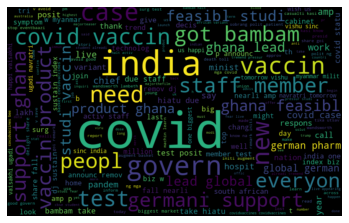

In [294]:
from wordcloud import WordCloud 

allWords = ' '.join([tweets for tweets in df7['clean_tweet']])
wordCloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [295]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

nltk.download('stopwords')

def remove_links(tweet):

    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet

def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    return tweet

my_stopwords = nltk.corpus.stopwords.words('english')
word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'

# cleaning master function
def clean_tweet(tweet, bigrams=False):
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = tweet.lower() # lower case
    tweet = re.sub('['+my_punctuation + ']+', ' ', tweet) # strip punctuation
    tweet = re.sub('\s+', ' ', tweet) #remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet) # remove numbers
    tweet_token_list = [word for word in tweet.split(' ')
                            if word not in my_stopwords] # remove stopwords

    tweet_token_list = [word_rooter(word) if '#' not in word else word
                        for word in tweet_token_list] # apply word rooter
    if bigrams:
        tweet_token_list = tweet_token_list+[tweet_token_list[i]+'_'+tweet_token_list[i+1]
                                            for i in range(len(tweet_token_list)-1)]
    tweet = ' '.join(tweet_token_list)
    return tweet

nltk.download('stopwords')

df7['clean_tweet'] = df7.Tweets.apply(clean_tweet)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [296]:
fetched_tweets = df7.clean_tweet.tolist()


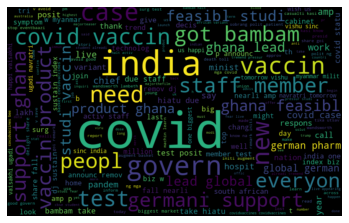

In [297]:
from wordcloud import WordCloud 

allWords = ' '.join([tweets for tweets in df7['clean_tweet']])
wordCloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [298]:
def get_tweet_sentiment(tweet):
		'''
		Utility function to classify sentiment of passed tweet
		using textblob's sentiment method
		'''
		# create TextBlob object of passed tweet text
		analysis = TextBlob(tweet)
		# set sentiment
		if analysis.sentiment.polarity > 0:
			return 'positive'
		elif analysis.sentiment.polarity == 0:
			return 'neutral'
		else:
			return 'negative'


In [299]:
from textblob import TextBlob
tweets = []
for tweet in fetched_tweets:
  #print(tweet)
				# empty dictionary to store required params of a tweet
  parsed_tweet = {}
  parsed_tweet['text'] = tweet
  parsed_tweet['sentiment']=get_tweet_sentiment(tweet)
  tweets.append(parsed_tweet)
	
 
	
print(tweets)

[{'text': 'tweet', 'sentiment': 'neutral'}, {'text': ' #got #bambam paus activ staff member test posit covid  ', 'sentiment': 'neutral'}, {'text': ' hear peep peopl trump covid medicin took use abort fetal tissu ', 'sentiment': 'neutral'}, {'text': ' make cabinet smaller remov ‘special envoy minist salaries’ ', 'sentiment': 'positive'}, {'text': ' couldn’t pay enough money vacat fl it’ covid liter trump w…', 'sentiment': 'neutral'}, {'text': ' vp recogn signatur anti poverti program angat buhay offic vice presid …', 'sentiment': 'neutral'}, {'text': ' big thank brave whistleblow step forward reveal realli happen…', 'sentiment': 'positive'}, {'text': ' germani 🇩🇪 support ghana 🇬🇭 feasibl studi vaccin product ghana lead global german pharm…', 'sentiment': 'neutral'}, {'text': 'tri last  hr covid test lab near sarjapura road home collect repli respons worst co… ', 'sentiment': 'negative'}, {'text': ' san antonio isd superintend pedro martinez outlin progress three year respons fight pande

In [300]:

   
# output the dataframe
  

ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
	# percentage of positive tweets
print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))
	# picking negative tweets from tweets
ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
	# percentage of negative tweets
print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))
	# percentage of neutral tweets
print("Neutral tweets percentage: {} % \
		".format(100*(len(tweets) -(len( ntweets )+len( ptweets)))/len(tweets)))

	# printing first 5 positive tweets
print("\n\nPositive tweets:")
for tweet in ptweets[:400]:
	print(tweet['text'])

	# printing first 5 negative tweets
print("\n\nNegative tweets:")
for tweet in ntweets[:10]:
  print(tweet['text'])


Positive tweets percentage: 27.761194029850746 %
Negative tweets percentage: 11.343283582089553 %
Neutral tweets percentage: 60.8955223880597 % 		


Positive tweets:
 make cabinet smaller remov ‘special envoy minist salaries’ 
 big thank brave whistleblow step forward reveal realli happen…
 sri lanka’ covid death toll top  read 
 elect commiss india utter failur ensur covid appropri behaviour polit function abso…
 also worth read 
 cbse student alreadi tremend pressur studi fear live appearing…
 🚨breaking🚨 new case #covid  variant first detect south africa found lambeth everyon aged…
 join facebook live morn offici launch unveil let join forc kick covid #ucc…
 cute blame china govern respons covid  
 riddl ok call new mutat “south african strain” can’t call covid the…
 surviv whole year covid pollen take outta wow
nh approv budesonid use case case basi among older adult 
 import everyon  across wandsworth get covid pcr test asap keep safe help st…
 on estim   million peopl live long co

In [301]:

import pandas as pd

df7 = pd.DataFrame(tweets, columns=['sentiment'])
df7.head(1000)


sentiment
0     neutral
1     neutral
2     neutral
3    positive
4     neutral
..        ...
330   neutral
331   neutral
332   neutral
333   neutral
334   neutral

[335 rows x 1 columns]

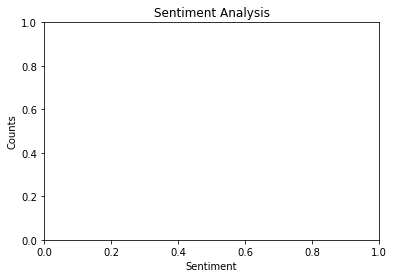

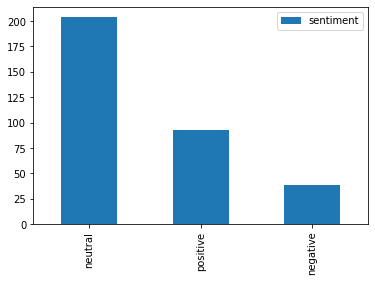

In [302]:
df7.apply(pd.Series.value_counts)
plt.title('Sentiment Analysis')
plt.xlabel ('Sentiment')
plt.ylabel('Counts')
df7.apply(pd.Series.value_counts).plot(kind = 'bar')
plt.show()


In [303]:
import pandas as pd
colnames = ['Tweets','is_retweet','retweeted','mentioned','hashtags','clean_tweet','cluster','new', 'tidy_text', 'tok', 'nouns']
df8 = pd.read_csv('c7.csv', names=colnames)


In [304]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

nltk.download('stopwords')

def remove_links(tweet):

    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet

def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    return tweet

my_stopwords = nltk.corpus.stopwords.words('english')
word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'

# cleaning master function
def clean_tweet(tweet, bigrams=False):
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = tweet.lower() # lower case
    tweet = re.sub('['+my_punctuation + ']+', ' ', tweet) # strip punctuation
    tweet = re.sub('\s+', ' ', tweet) #remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet) # remove numbers
    tweet_token_list = [word for word in tweet.split(' ')
                            if word not in my_stopwords] # remove stopwords

    tweet_token_list = [word_rooter(word) if '#' not in word else word
                        for word in tweet_token_list] # apply word rooter
    if bigrams:
        tweet_token_list = tweet_token_list+[tweet_token_list[i]+'_'+tweet_token_list[i+1]
                                            for i in range(len(tweet_token_list)-1)]
    tweet = ' '.join(tweet_token_list)
    return tweet

nltk.download('stopwords')

df8['clean_tweet'] = df8.Tweets.apply(clean_tweet)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [305]:
fetched_tweets = df8.clean_tweet.tolist()


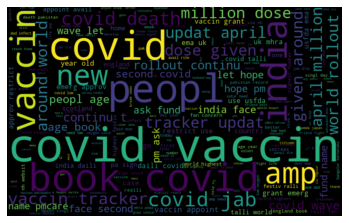

In [306]:
from wordcloud import WordCloud 

allWords = ' '.join([tweets for tweets in df8['clean_tweet']])
wordCloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [307]:
def get_tweet_sentiment(tweet):
		'''
		Utility function to classify sentiment of passed tweet
		using textblob's sentiment method
		'''
		# create TextBlob object of passed tweet text
		analysis = TextBlob(tweet)
		# set sentiment
		if analysis.sentiment.polarity > 0:
			return 'positive'
		elif analysis.sentiment.polarity == 0:
			return 'neutral'
		else:
			return 'negative'


In [308]:
from textblob import TextBlob
tweets = []
for tweet in fetched_tweets:
  #print(tweet)
				# empty dictionary to store required params of a tweet
  parsed_tweet = {}
  parsed_tweet['text'] = tweet
  parsed_tweet['sentiment']=get_tweet_sentiment(tweet)
  tweets.append(parsed_tweet)
	
 
	
print(tweets)

[{'text': 'tweet', 'sentiment': 'neutral'}, {'text': ' india face second covid wave let hope pm ask fund name pmcare  ', 'sentiment': 'neutral'}, {'text': ' thousand vulner australian anxious wait covid  vaccin ', 'sentiment': 'negative'}, {'text': ' discrimin new norm woke joe biden era 👉🏿🚨rhode island wast vaccin exclud white big covid…', 'sentiment': 'positive'}, {'text': ' india face second covid wave let hope pm ask fund name pmcare  ', 'sentiment': 'neutral'}, {'text': 'covid touch one condit get close anyon physic distanc #meme #covidmemes #covidndwave', 'sentiment': 'neutral'}, {'text': 'quick take #worldmortality came process hope lead us underst… ', 'sentiment': 'positive'}, {'text': ' person get covid vaccin forc get want get mean pleas if…', 'sentiment': 'negative'}, {'text': ' go tell peopl scream covid kill hundr thousand peopl last year death rate s…', 'sentiment': 'neutral'}, {'text': 'thank mam', 'sentiment': 'neutral'}, {'text': ' dear mom dad infect covid low oxygen 

In [309]:

   
# output the dataframe
  

ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
	# percentage of positive tweets
print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))
	# picking negative tweets from tweets
ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
	# percentage of negative tweets
print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))
	# percentage of neutral tweets
print("Neutral tweets percentage: {} % \
		".format(100*(len(tweets) -(len( ntweets )+len( ptweets)))/len(tweets)))

	# printing first 5 positive tweets
print("\n\nPositive tweets:")
for tweet in ptweets[:400]:
	print(tweet['text'])

	# printing first 5 negative tweets
print("\n\nNegative tweets:")
for tweet in ntweets[:10]:
  print(tweet['text'])


Positive tweets percentage: 27.956989247311828 %
Negative tweets percentage: 7.795698924731183 %
Neutral tweets percentage: 64.24731182795699 % 		


Positive tweets:
 discrimin new norm woke joe biden era 👉🏿🚨rhode island wast vaccin exclud white big covid…
quick take #worldmortality came process hope lead us underst… 
 core ask ahead biden #climate summit next week stab top   us  ghg cut   ja…
 great scholar maulana wahiduddin khan admit seriou condit apollo hospit sarita vihar late last nigh…
 myanmar daw aung san suu kyi face anoth new charg natur disast manag law relat covid  prot…
covid  vaccin appoint avail cv near new kensington pa sign      
covid  vaccin appoint avail cv near chambersburg pa sign      
covid  vaccin appoint avail rite aid near etter pa sign      
covid  vaccin appoint avail rite aid near dover pa sign      
covid  vaccin appoint avail rite aid near york pa sign      
covid  vaccin appoint avail rite aid near spring grove pa sign      
covid  vaccin appoint avai

In [310]:

import pandas as pd

df8 = pd.DataFrame(tweets, columns=['sentiment'])
df8.head(1000)


sentiment
0     neutral
1     neutral
2    negative
3    positive
4     neutral
..        ...
367   neutral
368   neutral
369   neutral
370  negative
371   neutral

[372 rows x 1 columns]

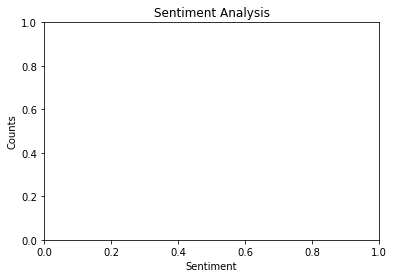

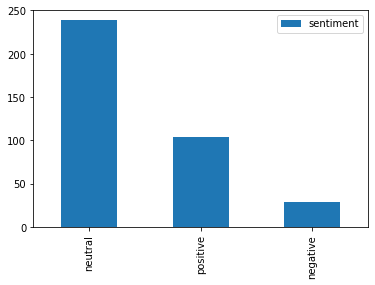

In [311]:
df8.apply(pd.Series.value_counts)
plt.title('Sentiment Analysis')
plt.xlabel ('Sentiment')
plt.ylabel('Counts')
df8.apply(pd.Series.value_counts).plot(kind = 'bar')
plt.show()


In [312]:
import pandas as pd
colnames = ['Tweets','is_retweet','retweeted','mentioned','hashtags','clean_tweet','cluster','new', 'tidy_text', 'tok', 'nouns']
df9 = pd.read_csv('c8.csv', names=colnames)


In [313]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

nltk.download('stopwords')

def remove_links(tweet):

    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet

def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    return tweet

my_stopwords = nltk.corpus.stopwords.words('english')
word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'

# cleaning master function
def clean_tweet(tweet, bigrams=False):
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = tweet.lower() # lower case
    tweet = re.sub('['+my_punctuation + ']+', ' ', tweet) # strip punctuation
    tweet = re.sub('\s+', ' ', tweet) #remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet) # remove numbers
    tweet_token_list = [word for word in tweet.split(' ')
                            if word not in my_stopwords] # remove stopwords

    tweet_token_list = [word_rooter(word) if '#' not in word else word
                        for word in tweet_token_list] # apply word rooter
    if bigrams:
        tweet_token_list = tweet_token_list+[tweet_token_list[i]+'_'+tweet_token_list[i+1]
                                            for i in range(len(tweet_token_list)-1)]
    tweet = ' '.join(tweet_token_list)
    return tweet

nltk.download('stopwords')

df9['clean_tweet'] = df9.Tweets.apply(clean_tweet)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [314]:
fetched_tweets = df9.clean_tweet.tolist()


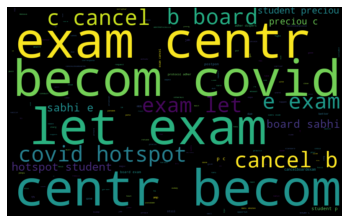

In [315]:
from wordcloud import WordCloud 

allWords = ' '.join([tweets for tweets in df9['clean_tweet']])
wordCloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [316]:
def get_tweet_sentiment(tweet):
		'''
		Utility function to classify sentiment of passed tweet
		using textblob's sentiment method
		'''
		# create TextBlob object of passed tweet text
		analysis = TextBlob(tweet)
		# set sentiment
		if analysis.sentiment.polarity > 0:
			return 'positive'
		elif analysis.sentiment.polarity == 0:
			return 'neutral'
		else:
			return 'negative'


In [317]:
from textblob import TextBlob
tweets = []
for tweet in fetched_tweets:
  #print(tweet)
				# empty dictionary to store required params of a tweet
  parsed_tweet = {}
  parsed_tweet['text'] = tweet
  parsed_tweet['sentiment']=get_tweet_sentiment(tweet)
  tweets.append(parsed_tweet)
	
 
	
print(tweets)

[{'text': 'tweet', 'sentiment': 'neutral'}, {'text': ' c cancel b board’ student e exam let exam centr becom covid hotspot student p…', 'sentiment': 'neutral'}, {'text': ' c cancel b board’ sabhi e exam let exam centr becom covid hotspot student preciou …', 'sentiment': 'neutral'}, {'text': ' c cancel b board’ sabhi e exam let exam centr becom covid hotspot student preciou …', 'sentiment': 'neutral'}, {'text': ' c cancel b board’ sabhi e exam let exam centr becom covid hotspot student preciou …', 'sentiment': 'neutral'}, {'text': ' c cancel b board’ sabhi e exam let exam centr becom covid hotspot student preciou …', 'sentiment': 'neutral'}, {'text': ' c cancel b board’ student e exam let exam centr becom covid hotspot student p…', 'sentiment': 'neutral'}, {'text': ' c cancel b board’ student e exam let exam centr becom covid hotspot student p…', 'sentiment': 'neutral'}, {'text': ' c cancel b board’ sabhi e exam let exam centr becom covid hotspot student preciou …', 'sentiment': 'neutra

In [318]:

   
# output the dataframe
  

ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
	# percentage of positive tweets
print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))
	# picking negative tweets from tweets
ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
	# percentage of negative tweets
print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))
	# percentage of neutral tweets
print("Neutral tweets percentage: {} % \
		".format(100*(len(tweets) -(len( ntweets )+len( ptweets)))/len(tweets)))

	# printing first 5 positive tweets
print("\n\nPositive tweets:")
for tweet in ptweets[:400]:
	print(tweet['text'])

	# printing first 5 negative tweets
print("\n\nNegative tweets:")
for tweet in ntweets[:10]:
  print(tweet['text'])


Positive tweets percentage: 2.3972602739726026 %
Negative tweets percentage: 1.0273972602739727 %
Neutral tweets percentage: 96.57534246575342 % 		


Positive tweets:
 could long covid hope you’r feel better soo
new achiev unlock 
 postpon board exam good idea ruin carrier student better conduct covid norm
 young peopl affect pandem 
 ok 
 cancel ssc amp hsc board exam still opportun save mani live #covid  eve…
rt aestheticallli exam get postpon due covid mbb whattt muh mbb student suppos magic im…


Negative tweets:
 “so late ” “tri realli hard get covid ”
view german correspond covid like poor alway us 
 jee neet exam also held one die due covid


In [319]:

import pandas as pd

df9 = pd.DataFrame(tweets, columns=['sentiment'])
df9.head(1000)


sentiment
0     neutral
1     neutral
2     neutral
3     neutral
4     neutral
..        ...
287   neutral
288   neutral
289   neutral
290   neutral
291   neutral

[292 rows x 1 columns]

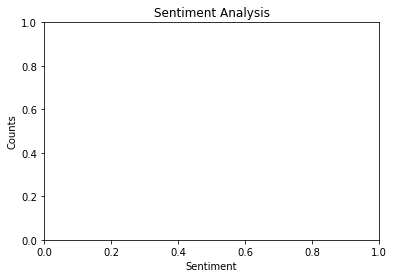

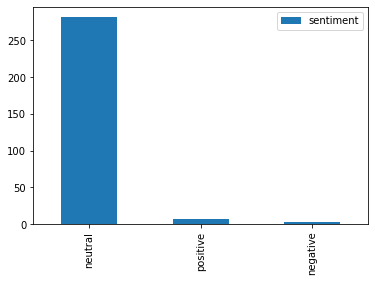

In [320]:
df9.apply(pd.Series.value_counts)
plt.title('Sentiment Analysis')
plt.xlabel ('Sentiment')
plt.ylabel('Counts')
df9.apply(pd.Series.value_counts).plot(kind = 'bar')
plt.show()


In [321]:
import pandas as pd
colnames = ['Tweets','is_retweet','retweeted','mentioned','hashtags','clean_tweet','cluster','new', 'tidy_text', 'tok', 'nouns']
df10 = pd.read_csv('c9.csv', names=colnames)


In [322]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

nltk.download('stopwords')

def remove_links(tweet):

    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet

def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    return tweet

my_stopwords = nltk.corpus.stopwords.words('english')
word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'

# cleaning master function
def clean_tweet(tweet, bigrams=False):
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = tweet.lower() # lower case
    tweet = re.sub('['+my_punctuation + ']+', ' ', tweet) # strip punctuation
    tweet = re.sub('\s+', ' ', tweet) #remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet) # remove numbers
    tweet_token_list = [word for word in tweet.split(' ')
                            if word not in my_stopwords] # remove stopwords

    tweet_token_list = [word_rooter(word) if '#' not in word else word
                        for word in tweet_token_list] # apply word rooter
    if bigrams:
        tweet_token_list = tweet_token_list+[tweet_token_list[i]+'_'+tweet_token_list[i+1]
                                            for i in range(len(tweet_token_list)-1)]
    tweet = ' '.join(tweet_token_list)
    return tweet

nltk.download('stopwords')

df10['clean_tweet'] = df10.Tweets.apply(clean_tweet)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [323]:
fetched_tweets = df10.clean_tweet.tolist()


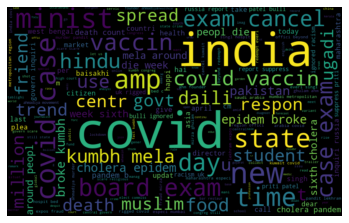

In [324]:
from wordcloud import WordCloud 

allWords = ' '.join([tweets for tweets in df10['clean_tweet']])
wordCloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [325]:
def get_tweet_sentiment(tweet):
		'''
		Utility function to classify sentiment of passed tweet
		using textblob's sentiment method
		'''
		# create TextBlob object of passed tweet text
		analysis = TextBlob(tweet)
		# set sentiment
		if analysis.sentiment.polarity > 0:
			return 'positive'
		elif analysis.sentiment.polarity == 0:
			return 'neutral'
		else:
			return 'negative'


In [326]:
from textblob import TextBlob
tweets = []
for tweet in fetched_tweets:
  #print(tweet)
				# empty dictionary to store required params of a tweet
  parsed_tweet = {}
  parsed_tweet['text'] = tweet
  parsed_tweet['sentiment']=get_tweet_sentiment(tweet)
  tweets.append(parsed_tweet)
	
 
	
print(tweets)

[{'text': 'tweet', 'sentiment': 'neutral'}, {'text': ' last elect ralli narendra modi west bengal that’ day elect commiss decid mani covid…', 'sentiment': 'positive'}, {'text': ' centr interven state well high court ask gujarat covid situat ', 'sentiment': 'positive'}, {'text': ' covid maharashtra spread modi ralli west bengal peopl roam around freeli never wore m…', 'sentiment': 'neutral'}, {'text': 'polic charg organ lethbridg hous parti violat covid  rule #covid #yq', 'sentiment': 'neutral'}, {'text': ' cholera epidem broke kumbh mela  around   peopl die week sixth cholera pandem b…', 'sentiment': 'neutral'}, {'text': 'suna hai  court staff judg covid par yahan twitter pe kitn judg khule aam ghoom rah… ', 'sentiment': 'neutral'}, {'text': ' imag base machin learn model covid  diagnosi suitabl clinic use diagnost imag read more…', 'sentiment': 'negative'}, {'text': ' smriti irani could india’ educ minist can’t garden sanchi madhya pradesh assign collect…', 'sentiment': 'neutral'}, {'

In [327]:

   
# output the dataframe
  

ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
	# percentage of positive tweets
print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))
	# picking negative tweets from tweets
ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
	# percentage of negative tweets
print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))
	# percentage of neutral tweets
print("Neutral tweets percentage: {} % \
		".format(100*(len(tweets) -(len( ntweets )+len( ptweets)))/len(tweets)))

	# printing first 5 positive tweets
print("\n\nPositive tweets:")
for tweet in ptweets[:400]:
	print(tweet['text'])

	# printing first 5 negative tweets
print("\n\nNegative tweets:")
for tweet in ntweets[:10]:
  print(tweet['text'])


Positive tweets percentage: 20.425531914893618 %
Negative tweets percentage: 8.51063829787234 %
Neutral tweets percentage: 71.06382978723404 % 		


Positive tweets:
 last elect ralli narendra modi west bengal that’ day elect commiss decid mani covid…
 centr interven state well high court ask gujarat covid situat 
someon explain first world countri cant get shit order countri 🥴🥴🥴🤦🏾‍♀️… 
 top scientist expert nanosci prof indrani banerji gujarat central univers die gasp breat…
 🔸️  recov covid  church member south korea declar donat  billion worth plasma cure #sh…
 last  day daili averag covid  case 👉 elect state tamil nadu   kerala   west bengal   as…
 𝐅𝐔𝐑𝐈𝐎𝐔𝐒 𝐋𝐄𝐃𝐀𝐌𝐀 𝐎𝐋𝐄𝐊𝐈𝐍𝐀 give silli smile ask took covid money #didrutokillkenei #…
 invit state crime journal special issu panel covid  pandem state crime thi… 
 member staff carri tray drink allerton manor golf cours new outdoor  seater beer garden i… 
 sit outsid pub cold good see   head spring step m…
 indian media muslim tablighi jamaa

In [328]:

import pandas as pd

df10 = pd.DataFrame(tweets, columns=['sentiment'])
df10.head(1000)


sentiment
0     neutral
1    positive
2    positive
3     neutral
4     neutral
..        ...
230   neutral
231   neutral
232   neutral
233   neutral
234   neutral

[235 rows x 1 columns]

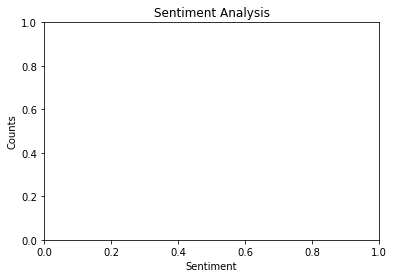

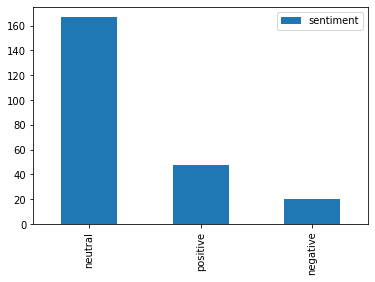

In [329]:
df10.apply(pd.Series.value_counts)
plt.title('Sentiment Analysis')
plt.xlabel ('Sentiment')
plt.ylabel('Counts')
df10.apply(pd.Series.value_counts).plot(kind = 'bar')
plt.show()
